## Group: 8
## Client: TNC
## Project: Two-Stage Direct Response Model

### Read in data

In [1]:
# import libraries for reading in csv data
import pandas as pd
import random
random.seed(12345)
import datetime
import numpy as np
import seaborn as sns
import sys
import itertools
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
from interpret.perf import ROC
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import StratifiedKFold
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import QuantileTransformer
from sklearn.metrics import (mean_squared_error, r2_score, accuracy_score, roc_auc_score, mean_squared_error)
from sklearn.tree import DecisionTreeRegressor

print("Python version:", sys.version)
NTHREAD = 4
SEED = 12345

Python version: 3.11.5 (main, Sep 11 2023, 08:31:25) [Clang 14.0.6 ]


In [2]:
# read csv files, store as dataframes
transfile=pd.read_csv('Data/Transfile.csv')
demofile=pd.read_csv('Data/Demofile.csv')
target_file=pd.read_csv('Data/Target1stPrtyfile.csv')

### Studying raw data

In [3]:
transfile.head()

,masterprimaryid,append_animal_welfare,append_animal,append_env,append_humanitarian,append_parks_nature,append_advocacy_political,append_civilrights,append_education,append_religion,...,append_wildlifewarriors,append_fundraisingpartners,append_competitors,append_direct_trans,append_web,append_dollar_life,append_trans_life,append_dollar_0_12M,append_env_enthusiasts,run_date
0,000004E1-D14E-42AB-A384-40A2773F507C,0,0,62,0,0,0,0,0,0,...,1,3,2,9,0,873,87,100,2,19DEC2023
1,0000257D-E8FD-4D5D-A589-EB04519D655F,0,0,5,0,0,0,0,0,0,...,0,0,9,0,1,10010,121,630,5,19DEC2023
2,000026B3-046F-4E71-9C90-9BDEF05882F5,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,9836,119,0,0,19DEC2023
3,0000357F-B1E3-4A2E-9736-345D032DA73E,1,3,47,1,7,0,0,0,4,...,5,28,68,51,0,43947,821,2871,13,19DEC2023
4,00004DFC-048B-41B2-B7BC-723FB3383150,0,0,7,0,0,0,0,0,0,...,0,0,13,7,3,24196,211,1512,4,19DEC2023


In [4]:
demofile.head()

,masterprimaryid,append_NetWorth,append_HomeValue,append_age,append_age_indicator,append_WealthResources,append_HouseHoldEducation,append_enviroconquintile,append_FamilyComp,append_MaritalStatus,append_mt_OnlineInsuranceBuyer,append_mt_CultureArtsEvents,append_mt_HighDollarDonor,append_mt_LowDollarDonor,birth_year,append_ethnicity,append_ethnicitygrp,run_date
0,000004E1-D14E-42AB-A384-40A2773F507C,0,430.0,46.0,H,2,4,NaN,14.0,NaN,71.0,16.0,70.0,29.0,1977.0,Thai,Far Eastern,20DEC2023
1,0000257D-E8FD-4D5D-A589-EB04519D655F,10,500.0,52.0,S,10,4,NaN,2.0,NaN,21.0,18.0,4.0,39.0,1971.0,Italian,Mediterranean,20DEC2023
2,000026B3-046F-4E71-9C90-9BDEF05882F5,4,241.0,84.0,S,3,4,NaN,14.0,NaN,16.0,27.0,59.0,15.0,1939.0,English,Western European,20DEC2023
3,0000357F-B1E3-4A2E-9736-345D032DA73E,9,186.0,87.0,S,8,5,NaN,12.0,NaN,62.0,15.0,3.0,25.0,1936.0,English,Western European,20DEC2023
4,00004DFC-048B-41B2-B7BC-723FB3383150,9,685.0,38.0,A,8,5,NaN,11.0,NaN,85.0,15.0,20.0,12.0,1985.0,NaN,NaN,20DEC2023


In [5]:
target_file.head()

,PrimaryKey,masterprimaryid,TGTresp,TGTgiftamt,LifeCycle,LifeCycleDetail,GivingYears,cumul_amount,first_gift_amount,first_gift_channel,...,HPG_channel,MRG_amount,MRG_channel,Prior_Channel_Behavior,Monthsback,donor_status,Monthly_Donor,avg_gift_amt,YE_Behavior,Gift_Behavior
0,000004E1-D14E-42AB-A384-40A2773F507C|AHOMA2010...,000004E1-D14E-42AB-A384-40A2773F507C,0,0.0,Lapsed,Lapsed 13-24 Mos,1,$10.00,$10.00,Offline,...,Offline,$10.00,Offline,No Prior Giving,13,25 Months lapsed,N,10.000000,C: Non YE Only,D: Others Only
1,000004E1-D14E-42AB-A384-40A2773F507C|AHOMA2010...,000004E1-D14E-42AB-A384-40A2773F507C,0,0.0,Lapsed,Lapsed 13-24 Mos,1,$10.00,$10.00,Offline,...,Offline,$10.00,Offline,No Prior Giving,13,25 Months lapsed,N,10.000000,C: Non YE Only,D: Others Only
2,000004E1-D14E-42AB-A384-40A2773F507C|AILMA2011...,000004E1-D14E-42AB-A384-40A2773F507C,0,0.0,Lapsed,Lapsed 13-24 Mos,1,$10.00,$10.00,Offline,...,Offline,$10.00,Offline,No Prior Giving,14,25 Months lapsed,N,10.000000,C: Non YE Only,D: Others Only
3,000004E1-D14E-42AB-A384-40A2773F507C|AILMA2111...,000004E1-D14E-42AB-A384-40A2773F507C,0,0.0,Lapsed,Lapsed 25-36 Mos,1,$10.00,$10.00,Offline,...,Offline,$10.00,Offline,No Prior Giving,27,36 Months lapsed,N,10.000000,C: Non YE Only,D: Others Only
4,0000257D-E8FD-4D5D-A589-EB04519D655F|AGAMA2011...,0000257D-E8FD-4D5D-A589-EB04519D655F,0,0.0,Consecutive Givers,Consecutive 5+ Years,19,"$2,760.00",$30.00,Offline,...,Offline,$20.00,Offline,Offline Only,1,less than 12months,Y,20.597015,A: Both YE and Non YE,A: All


In [6]:
trans_ct = transfile.count()
demo_ct = demofile.count()
target_ct = target_file.count()

print(f'num rows in transfile: {trans_ct}\nnum rows in demofile: {demo_ct}\nnum rows in target_file: {target_ct}')

num rows in transfile: masterprimaryid               1006110
append_animal_welfare         1006110
append_animal                 1006110
append_env                    1006110
append_humanitarian           1006110
append_parks_nature           1006110
append_advocacy_political     1006110
append_civilrights            1006110
append_education              1006110
append_religion               1006110
append_medsvcs_supp           1006110
append_cure                   1006110
append_spaces                 1006110
append_guardian_angles        1006110
append_wildlifewarriors       1006110
append_fundraisingpartners    1006110
append_competitors            1006110
append_direct_trans           1006110
append_web                    1006110
append_dollar_life            1006110
append_trans_life             1006110
append_dollar_0_12M           1006110
append_env_enthusiasts        1006110
run_date                      1006110
dtype: int64
num rows in demofile: masterprimaryid               

### Join all files for one dataset

In [7]:
# inner join on all three csv files using masterprimaryid
all_fields = transfile.merge(demofile, how='inner', on='masterprimaryid').merge(target_file, how='inner', on='masterprimaryid')
all_fields.head()

,masterprimaryid,append_animal_welfare,append_animal,append_env,append_humanitarian,append_parks_nature,append_advocacy_political,append_civilrights,append_education,append_religion,...,HPG_channel,MRG_amount,MRG_channel,Prior_Channel_Behavior,Monthsback,donor_status,Monthly_Donor,avg_gift_amt,YE_Behavior,Gift_Behavior
0,000004E1-D14E-42AB-A384-40A2773F507C,0,0,62,0,0,0,0,0,0,...,Offline,$10.00,Offline,No Prior Giving,13,25 Months lapsed,N,10.000000,C: Non YE Only,D: Others Only
1,000004E1-D14E-42AB-A384-40A2773F507C,0,0,62,0,0,0,0,0,0,...,Offline,$10.00,Offline,No Prior Giving,13,25 Months lapsed,N,10.000000,C: Non YE Only,D: Others Only
2,000004E1-D14E-42AB-A384-40A2773F507C,0,0,62,0,0,0,0,0,0,...,Offline,$10.00,Offline,No Prior Giving,14,25 Months lapsed,N,10.000000,C: Non YE Only,D: Others Only
3,000004E1-D14E-42AB-A384-40A2773F507C,0,0,62,0,0,0,0,0,0,...,Offline,$10.00,Offline,No Prior Giving,27,36 Months lapsed,N,10.000000,C: Non YE Only,D: Others Only
4,0000257D-E8FD-4D5D-A589-EB04519D655F,0,0,5,0,0,0,0,0,0,...,Offline,$20.00,Offline,Offline Only,1,less than 12months,Y,20.597015,A: Both YE and Non YE,A: All


In [8]:
# viewing size, column names, and column types of all_fields
all_fields.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276648 entries, 0 to 3276647
Data columns (total 62 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   masterprimaryid                 object 
 1   append_animal_welfare           int64  
 2   append_animal                   int64  
 3   append_env                      int64  
 4   append_humanitarian             int64  
 5   append_parks_nature             int64  
 6   append_advocacy_political       int64  
 7   append_civilrights              int64  
 8   append_education                int64  
 9   append_religion                 int64  
 10  append_medsvcs_supp             int64  
 11  append_cure                     int64  
 12  append_spaces                   int64  
 13  append_guardian_angles          int64  
 14  append_wildlifewarriors         int64  
 15  append_fundraisingpartners      int64  
 16  append_competitors              int64  
 17  append_direct_trans        

### Handling non-numeric x variables

In [9]:
# function for creating dummies for categorical variables
def create_dummies(x, all_fields):
    temp_df = pd.get_dummies(all_fields[x], prefix=x, dtype=int)
    all_fields = pd.concat([all_fields, temp_df], axis=1)
    return all_fields

categorical_vars = ['Monthly_Donor', 'donor_status', 'YE_Behavior', 'Gift_Behavior', 'Prior_Channel_Behavior', 'MRG_channel', 'HPG_channel',
                     'LifeCycle', 'LifeCycleDetail', 'first_gift_channel', 'append_FamilyComp']

for x in categorical_vars:
    all_fields = create_dummies(x, all_fields)

In [10]:
# dropping columns which were converted to dummies, plus a few we don't intend to use
all_fields = all_fields.drop(columns=['append_ethnicitygrp', 'append_ethnicity', 'first_gift_channel', 'LifeCycleDetail', 'LifeCycle',
                                     'HPG_channel', 'MRG_channel', 'Prior_Channel_Behavior', 'Gift_Behavior', 'YE_Behavior', 'donor_status',
                                     'Monthly_Donor', 'append_MaritalStatus', 'append_spaces', 'append_FamilyComp'])

In [11]:
# converting currency strings to float type
# ignore warning
all_fields['HPG_amount'] = all_fields['HPG_amount'].str.replace('$', '').str.replace(',', '').astype('float')
all_fields['MRG_amount'] = all_fields['MRG_amount'].str.replace('$', '').str.replace(',', '').astype('float')
all_fields['cumul_amount'] = all_fields['cumul_amount'].str.replace('$', '').str.replace(',', '').astype('float')
all_fields['first_gift_amount'] = all_fields['first_gift_amount'].str.replace('$', '').str.replace(',', '').astype('float')

In [12]:
# checking in on what our data looks like now
all_fields.head()

,masterprimaryid,append_animal_welfare,append_animal,append_env,append_humanitarian,append_parks_nature,append_advocacy_political,append_civilrights,append_education,append_religion,...,append_FamilyComp_7.0,append_FamilyComp_8.0,append_FamilyComp_9.0,append_FamilyComp_10.0,append_FamilyComp_11.0,append_FamilyComp_12.0,append_FamilyComp_13.0,append_FamilyComp_14.0,append_FamilyComp_15.0,append_FamilyComp_16.0
0,000004E1-D14E-42AB-A384-40A2773F507C,0,0,62,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,000004E1-D14E-42AB-A384-40A2773F507C,0,0,62,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,000004E1-D14E-42AB-A384-40A2773F507C,0,0,62,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,000004E1-D14E-42AB-A384-40A2773F507C,0,0,62,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0000257D-E8FD-4D5D-A589-EB04519D655F,0,0,5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
all_fields.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276648 entries, 0 to 3276647
Columns: 108 entries, masterprimaryid to append_FamilyComp_16.0
dtypes: float64(14), int64(89), object(5)
memory usage: 2.6+ GB


### Missing Values

In [14]:
missing_values_count = all_fields.isnull().sum()

In [15]:
print(missing_values_count)

masterprimaryid           0
append_animal_welfare     0
append_animal             0
append_env                0
append_humanitarian       0
                         ..
append_FamilyComp_12.0    0
append_FamilyComp_13.0    0
append_FamilyComp_14.0    0
append_FamilyComp_15.0    0
append_FamilyComp_16.0    0
Length: 108, dtype: int64


In [16]:
for column, count in missing_values_count.items():
    print(f"{column}: {count}")

masterprimaryid: 0
append_animal_welfare: 0
append_animal: 0
append_env: 0
append_humanitarian: 0
append_parks_nature: 0
append_advocacy_political: 0
append_civilrights: 0
append_education: 0
append_religion: 0
append_medsvcs_supp: 0
append_cure: 0
append_guardian_angles: 0
append_wildlifewarriors: 0
append_fundraisingpartners: 0
append_competitors: 0
append_direct_trans: 0
append_web: 0
append_dollar_life: 0
append_trans_life: 0
append_dollar_0_12M: 0
append_env_enthusiasts: 0
run_date_x: 0
append_NetWorth: 0
append_HomeValue: 2
append_age: 23215
append_age_indicator: 23215
append_WealthResources: 0
append_HouseHoldEducation: 0
append_enviroconquintile: 3276183
append_mt_OnlineInsuranceBuyer: 68778
append_mt_CultureArtsEvents: 68778
append_mt_HighDollarDonor: 68778
append_mt_LowDollarDonor: 68778
birth_year: 23215
run_date_y: 0
PrimaryKey: 0
TGTresp: 0
TGTgiftamt: 0
GivingYears: 0
cumul_amount: 0
first_gift_amount: 0
gift_count: 0
HPG_amount: 0
MRG_amount: 0
Monthsback: 0
avg_gift_amt

In [17]:
# let's apply the mean to missing values for the following columns:
    # append_mt_OnlineInsuranceBuyer
    # append_mt_CultureArtsEvents
    # append_mt_HighDollarDonor
    # append_mt_LowDollarDonor

columns_to_fill = [
    'append_mt_OnlineInsuranceBuyer',
    'append_mt_CultureArtsEvents',
    'append_mt_HighDollarDonor',
    'append_mt_LowDollarDonor'
]
# using the mean of each column to fill that column's nulls
for column in columns_to_fill:
        all_fields[column].fillna(all_fields[column].mean(), inplace=True)

In [18]:
# drop append_enviroconquintile
all_fields.drop('append_enviroconquintile', axis=1, inplace=True)

In [19]:
# Delete rows with missing values in the append_HomeValue column
all_fields.dropna(subset=['append_HomeValue'], inplace=True)

In [20]:
# aplly mean to missing values of age
mean_append_age = all_fields['append_age'].mean()
all_fields['append_age'].fillna(mean_append_age, inplace=True)

### Target Variables

In [21]:
all_fields['TGTgiftamt'].mean()

0.884472469714458

In [22]:
respGroups = all_fields.groupby(['TGTresp']).count()
respGroups

,masterprimaryid,append_animal_welfare,append_animal,append_env,append_humanitarian,append_parks_nature,append_advocacy_political,append_civilrights,append_education,append_religion,...,append_FamilyComp_7.0,append_FamilyComp_8.0,append_FamilyComp_9.0,append_FamilyComp_10.0,append_FamilyComp_11.0,append_FamilyComp_12.0,append_FamilyComp_13.0,append_FamilyComp_14.0,append_FamilyComp_15.0,append_FamilyComp_16.0
TGTresp,,,,,,,,,,,,,,,,,,,,,
0,3191715,3191715,3191715,3191715,3191715,3191715,3191715,3191715,3191715,3191715,...,3191715,3191715,3191715,3191715,3191715,3191715,3191715,3191715,3191715,3191715
1,84931,84931,84931,84931,84931,84931,84931,84931,84931,84931,...,84931,84931,84931,84931,84931,84931,84931,84931,84931,84931


### Load Data

In [23]:
data = all_fields

In [24]:
x_names_df = data
# dropping some more x values we are not considering for model use
x_names_df = x_names_df.drop(columns=['PrimaryKey', 'TGTresp', 'TGTgiftamt', 'run_date_y', 'run_date_x', 'append_age_indicator', 'birth_year'])
x_names_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3276646 entries, 0 to 3276647
Data columns (total 100 columns):
 #   Column                                            Dtype  
---  ------                                            -----  
 0   masterprimaryid                                   object 
 1   append_animal_welfare                             int64  
 2   append_animal                                     int64  
 3   append_env                                        int64  
 4   append_humanitarian                               int64  
 5   append_parks_nature                               int64  
 6   append_advocacy_political                         int64  
 7   append_civilrights                                int64  
 8   append_education                                  int64  
 9   append_religion                                   int64  
 10  append_medsvcs_supp                               int64  
 11  append_cure                                       int64  
 12  appe

In [25]:
# for now (before completing model feature selection) we are loading data with all of the x values we are still considering
y_name = 'TGTresp'
x_names = x_names_df.columns.tolist()

In [26]:
SEED = 12345
np.random.seed(SEED) # preserve exact reproducibility for this cell

split_ratio = 0.7 # 70%/30% train/test split

# execute split
split = np.random.rand(len(data)) < split_ratio
train = data[split]
valid = data[~split]

# summarize split
print('Train data rows = %d, columns = %d' % (train.shape[0], train.shape[1]))
print('Validation data rows = %d, columns = %d' % (valid.shape[0], valid.shape[1]))

# exp.data_loader(data=train[x_names+[y_name]])

Train data rows = 2293543, columns = 107
Validation data rows = 983103, columns = 107


In [27]:
# training data filtered to contain only rows where TGTresp = 1
respGroups = train.groupby(['TGTresp'])
train_responders = respGroups.get_group(1)

In [28]:
# test data filtered to contain only rows where TGTresp = 1
respGroups = valid.groupby(['TGTresp'])
test_responders = respGroups.get_group(1)

In [29]:
def model_grid(train, valid, x_names, y_name, model_type, model_params=None, n_models=None, seed=None):
    
    """ Performs a random grid search over n_models and model_params.

    :param train_x: X training data as Pandas DataFrame.
    :param train_y: Y training data as Pandas DataFrame.
    :param test_x: X validation data as Pandas DataFrame.
    :param test_y: Y validation data as Pandas DataFrame.
    :param gs_params: Dictionary of lists of potential EBM parameters over which to search.   
    :param n_models: Number of random models to evaluate.
    :param early_stop_thres: GAMI-NET early stopping threshold.
    :param random_state: Random seed for better interpretability.
    :return: Best candidate model from random grid search.

    """

    # cartesian product of gs_params
    keys, values = zip(*model_params.items())
    experiments = [dict(zip(keys, v)) for v in itertools.product(*values)]

    # preserve exact reproducibility for this function
    np.random.seed(SEED) 
    
    # select randomly from cartesian product space
    selected_experiments = np.random.choice(len(experiments), n_models)

    # set global params for seed, etc.
    params = {'random_state': SEED}

    # init grid search loop
    best_candidate = None
    best_score = 0
    best_mse = 4000

    # grid search loop
    #exp = Experiment()
    for i, exper in enumerate(selected_experiments):

        params.update(experiments[exper])  # override global params with current grid run params

        print('Grid search run %d/%d:' % (int(i + 1), int(n_models)))
        print('Training with parameters:', params)
        
        # train 
        current_model = model_type(**params)
        print(current_model)
        candidate = current_model.fit(train[x_names], train[y_name])
        
        # calculate AUC for classification models:
        if model_type in [DecisionTreeClassifier, LogisticRegression]:
            #perf = ROC(current_model.predict_proba).explain_perf(valid[x_names], valid[y_name])
            perf = f1_score(valid[y_name], current_model.predict(valid[x_names]))
            #candidate_best_score = perf._internal_obj['overall']['f1']
            candidate_best_score = perf

            # determine if current model is better than previous best
            if candidate_best_score > best_score:
                best_candidate = candidate
                best_score = candidate_best_score
                print('Grid search new best score discovered at iteration %d/%d: %.4f.' %
                                 (int(i + 1), int(n_models), candidate_best_score))
    
            print('---------- ----------')

        else:
            regr_trans = TransformedTargetRegressor(regressor=current_model, transformer=QuantileTransformer(output_distribution='normal'))
            regr_trans.fit(train[x_names], train[y_name])
            ypred = regr_trans.predict(valid[x_names])
            ypred = ypred.astype(float)
            mse_pred = round(mean_squared_error(valid[y_name], ypred),3)
            # determine if current model is better than previous best
            if mse_pred < best_mse:
                best_candidate = candidate
                best_mse = mse_pred
                print('Grid search new best mse discovered at iteration %d/%d: %.4f.' %
                                 (int(i + 1), int(n_models), mse_pred))
    
            print('---------- ----------')
        
        del current_model
            
    return best_candidate

### Phase 1 Feature Selection

In [30]:
feature_sel = x_names
feature_sel.remove('masterprimaryid')


In [75]:
cftkbest = make_pipeline(SelectKBest(score_func=chi2, k=10), DecisionTreeClassifier(class_weight={0: 0.3, 1: 1.2}, max_depth=9,
                       min_samples_leaf=5, min_samples_split=3, random_state=12345))
cftkbest.fit(train[feature_sel], train[y_name])

Pipeline(steps=[('selectkbest',
                 SelectKBest(score_func=<function chi2 at 0x16981afc0>)),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(class_weight={0: 0.3, 1: 1.2},
                                        max_depth=9, min_samples_leaf=5,
                                        min_samples_split=3,
                                        random_state=12345))])

In [76]:
lrkbest = make_pipeline(SelectKBest(score_func=chi2, k=10), LogisticRegression(solver='newton-cholesky', C=.3, max_iter=10, random_state=12345, 
                               class_weight={0: 0.3, 1: 1.2}))
lrkbest.fit(train[feature_sel], train[y_name])

Pipeline(steps=[('selectkbest',
                 SelectKBest(score_func=<function chi2 at 0x16981afc0>)),
                ('logisticregression',
                 LogisticRegression(C=0.3, class_weight={0: 0.3, 1: 1.2},
                                    max_iter=10, random_state=12345,
                                    solver='newton-cholesky'))])

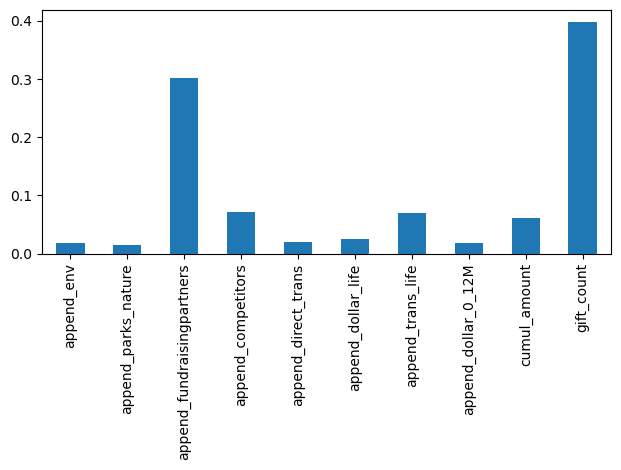

In [77]:
index_features = cftkbest[:-1].get_feature_names_out()
pd.Series(cftkbest[-1].feature_importances_, index=index_features).plot.bar()
plt.tight_layout()

In [78]:
cftkbest[:-1].get_feature_names_out()

array(['append_env', 'append_parks_nature', 'append_fundraisingpartners',
       'append_competitors', 'append_direct_trans', 'append_dollar_life',
       'append_trans_life', 'append_dollar_0_12M', 'cumul_amount',
       'gift_count'], dtype=object)

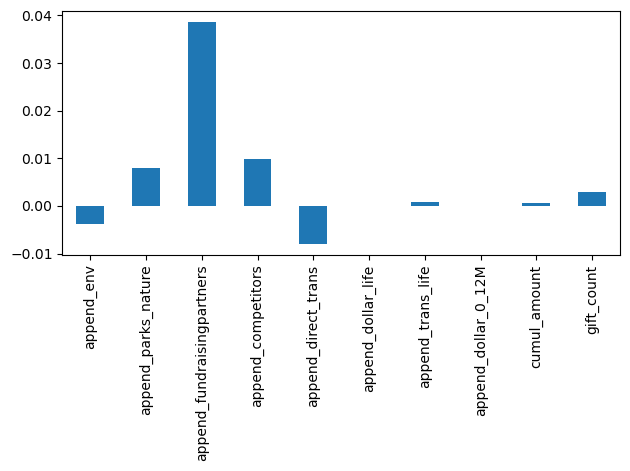

In [79]:
index_features = lrkbest[:-1].get_feature_names_out()
pd.Series(lrkbest[-1].coef_[0], index=index_features).plot.bar()
plt.tight_layout()

In [80]:
lrkbest[:-1].get_feature_names_out()

array(['append_env', 'append_parks_nature', 'append_fundraisingpartners',
       'append_competitors', 'append_direct_trans', 'append_dollar_life',
       'append_trans_life', 'append_dollar_0_12M', 'cumul_amount',
       'gift_count'], dtype=object)

## Phase 1 Models

In [87]:
# final selected features
# based on combination of selectKbest feature selection and review of all features' distributions
x_names = ['append_animal',
 'append_env',
 'append_wildlifewarriors',
 'append_fundraisingpartners',
 'append_competitors',
 'append_env_enthusiasts',
 'append_direct_trans',
 'YE_Behavior_A: Both YE and Non YE',
 'Gift_Behavior_A: All',
 'Gift_Behavior_D: Others Only',
 'LifeCycleDetail_Consecutive 5+ Years',
 'LifeCycle_Consecutive Givers',
 'GivingYears',
 'cumul_amount',
 'append_trans_life',
 'Monthly_Donor_Y',
 'Monthly_Donor_N',
 'gift_count',
 'append_parks_nature']

In [67]:
train[x_names]

,append_env,append_parks_nature,append_fundraisingpartners,append_competitors,append_direct_trans,append_dollar_life,append_trans_life,append_dollar_0_12M,cumul_amount,gift_count
1,62,0,3,2,9,873,87,100,10.0,1
2,62,0,3,2,9,873,87,100,10.0,1
3,62,0,3,2,9,873,87,100,10.0,1
4,5,0,0,9,0,10010,121,630,2760.0,134
5,5,0,0,9,0,10010,121,630,3000.0,146
...,...,...,...,...,...,...,...,...,...,...
3276640,19,5,1,21,7,7065,117,1368,25.0,1
3276641,19,5,1,21,7,7065,117,1368,25.0,1
3276642,19,5,1,21,7,7065,117,1368,25.0,1
3276646,0,0,1,8,0,3288,62,30,15.0,1


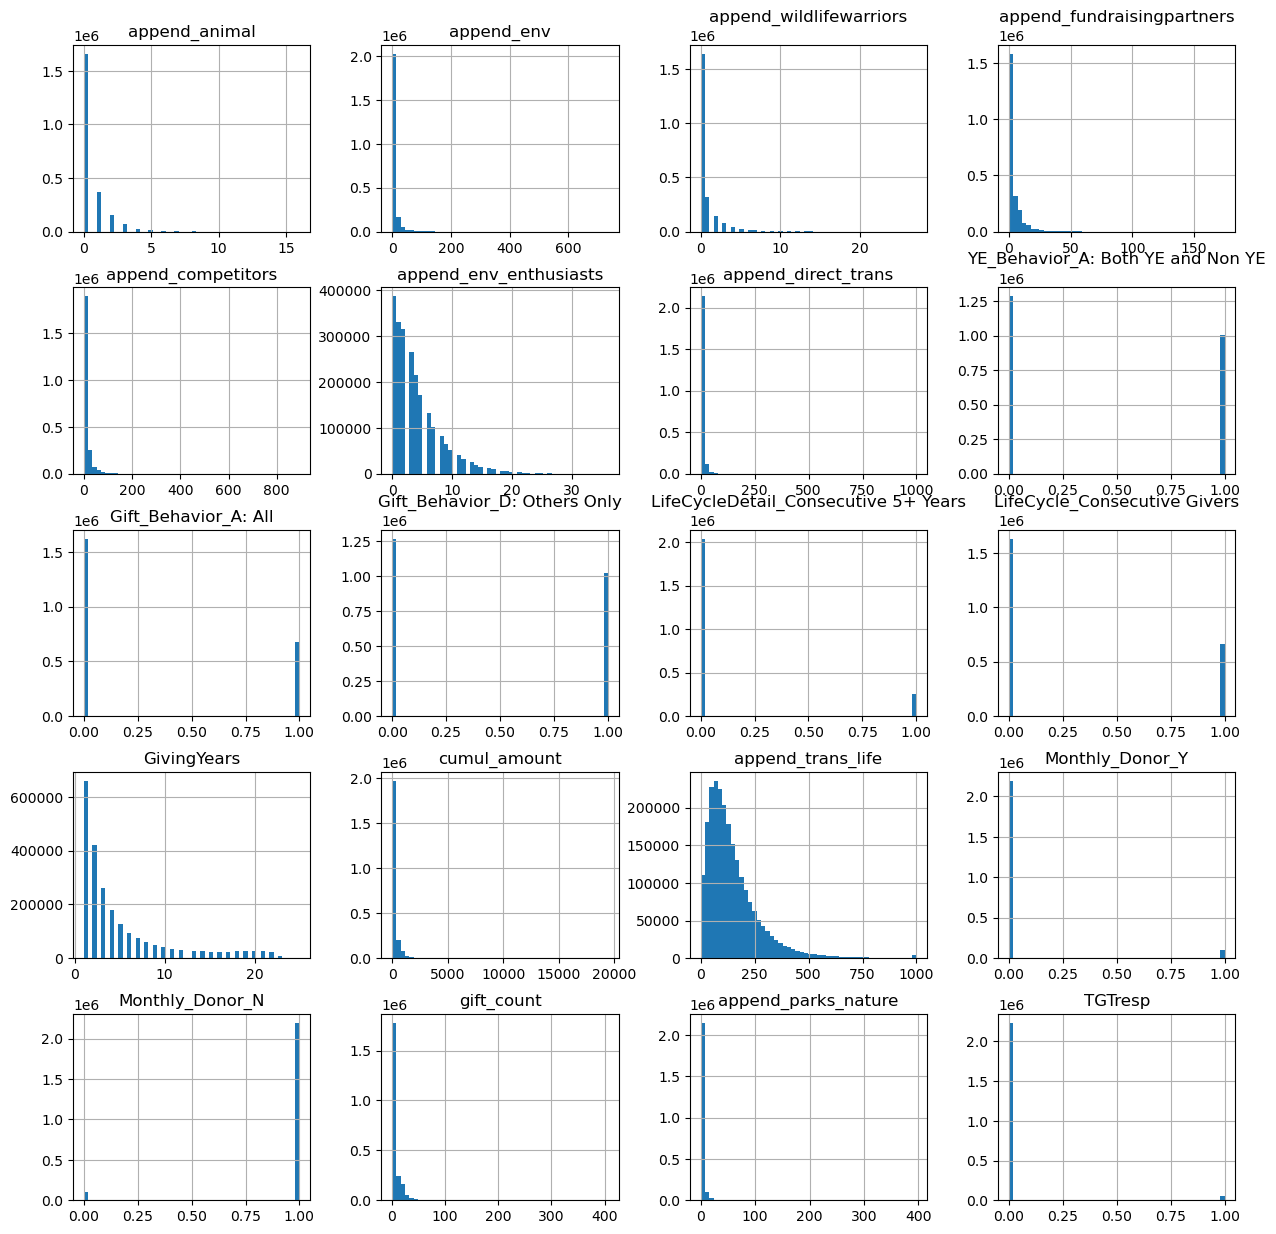

In [86]:
_ = train[x_names + ['TGTresp']].hist(bins=50, figsize=(15, 15))

In [ ]:
# dictionary of hyperparameter value lists for grid search

'''model_params = {'max_depth': np.arange(1,20,1),
              'min_samples_leaf': np.arange(1,20,1),
              'class_weight':[{0:0.1,1:0.3}, {0:0.1,1:0.4}, {0:0.1,1:0.5}, {0:0.1,1:0.6}, {0:0.1,1:0.7},
                             {0:0.1,1:0.8}, {0:0.1,1:0.9}, {0:0.1,1:1.0}, {0:0.1,1:1.1}, {0:0.1,1:1.2}]}

# Decision Tree Classifier grid search
best_model = model_grid(train, valid, x_names, y_name, DecisionTreeClassifier, model_params=model_params, n_models=200, 
                    seed=SEED)'''

In [88]:
clftree = DecisionTreeClassifier(class_weight={0: 0.3, 1: 1.2}, max_depth=9,
                       min_samples_leaf=5, min_samples_split=3, random_state=12345).fit(train[x_names], train[y_name])

In [89]:
from sklearn.calibration import CalibratedClassifierCV
base_clf = clftree
calibrated_clf = CalibratedClassifierCV(base_clf, cv=15)
calibrated_clf.fit(train[x_names], train[y_name])


CalibratedClassifierCV(cv=15,
                       estimator=DecisionTreeClassifier(class_weight={0: 0.3,
                                                                      1: 1.2},
                                                        max_depth=9,
                                                        min_samples_leaf=5,
                                                        min_samples_split=3,
                                                        random_state=12345))

In [90]:
clf_roc = roc_auc_score(valid[y_name], calibrated_clf.predict_proba(valid[x_names])[:, 1])
print(clf_roc)

0.73225493099127


In [91]:
# probabiliy predictions for validation data in classification tree model
clftree_probs=clftree.predict_proba(valid[x_names])
clftree_pred = clftree.predict(valid[x_names])
print(clftree.classes_)
print(clftree_probs)

[0 1]
[[0.95915489 0.04084511]
 [0.9780503  0.0219497 ]
 [0.9780503  0.0219497 ]
 ...
 [0.93390085 0.06609915]
 [0.86971665 0.13028335]
 [0.86971665 0.13028335]]


<Axes: >

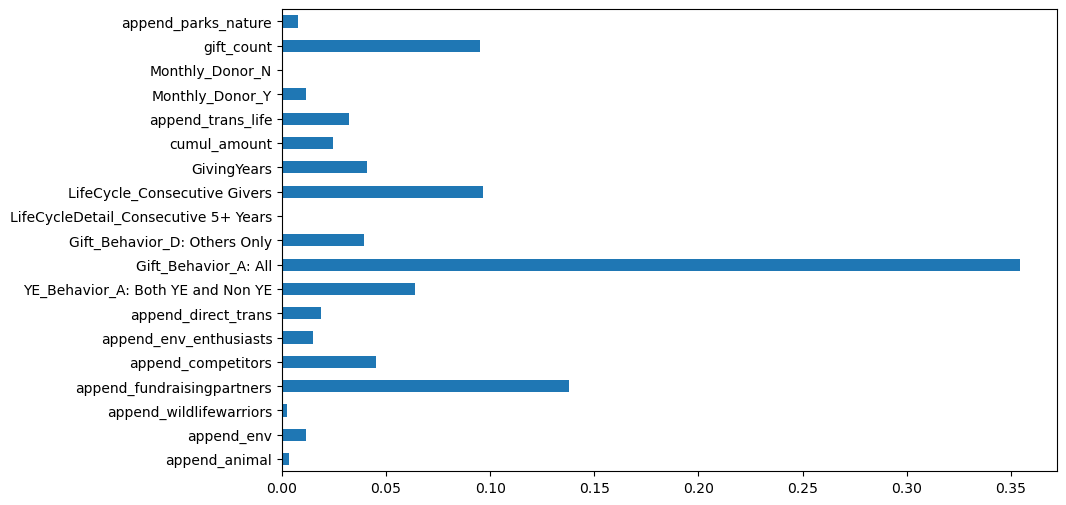

In [92]:
# feature importance for classification tree model
plt.figure(figsize=(10,6))
(pd.Series(clftree.feature_importances_, clftree.feature_names_in_)
   .plot(kind='barh'))

In [ ]:
# dictionary of hyperparameter value lists for grid search
'''model_params = {'max_iter': np.arange(100,150,1),
              'C': np.arange(0.1,1.0,0.1)}

# Logistic Regression grid search
best_model = model_grid(train, valid, x_names, y_name, LogisticRegression, model_params=model_params, n_models=200, 
                    seed=SEED)
print(best_model)'''

In [93]:
logis_reg = LogisticRegression(solver='newton-cholesky', C=.3, max_iter=10, random_state=12345, 
                               class_weight={0: 0.3, 1: 1.2}).fit(train[x_names], train[y_name])


In [94]:
from sklearn.calibration import CalibratedClassifierCV
base_clf = logis_reg
calibrated_log = CalibratedClassifierCV(base_clf, cv=15)
calibrated_log.fit(train[x_names], train[y_name])

CalibratedClassifierCV(cv=15,
                       estimator=LogisticRegression(C=0.3,
                                                    class_weight={0: 0.3,
                                                                  1: 1.2},
                                                    max_iter=10,
                                                    random_state=12345,
                                                    solver='newton-cholesky'))

In [95]:
log_roc = roc_auc_score(valid[y_name], calibrated_log.predict_proba(valid[x_names])[:, 1])
print(log_roc)

0.7146933552609749


In [96]:
# probabiliy predictions for validation data in logistic regressor model
logis_probs=logis_reg.predict_proba(valid[x_names])
logis_pred = logis_reg.predict(valid[x_names])
print(logis_reg.classes_)
print(logis_probs)

[0 1]
[[0.96132761 0.03867239]
 [0.96180804 0.03819196]
 [0.96180804 0.03819196]
 ...
 [0.93920265 0.06079735]
 [0.8772878  0.1227122 ]
 [0.8772878  0.1227122 ]]


<Axes: ylabel='Feature'>

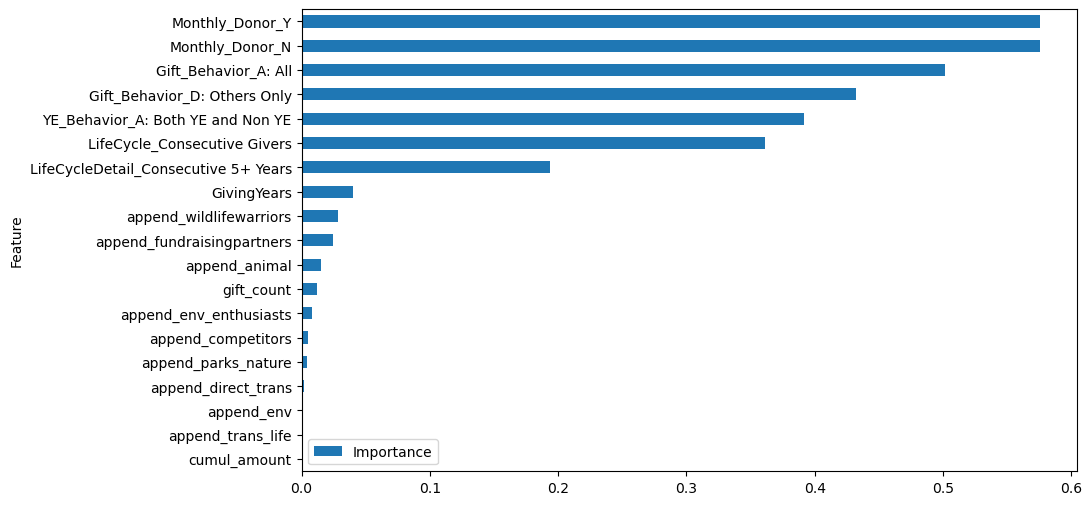

In [97]:
# feature importance for logistic regression model
coefficients = logis_reg.coef_
avg_importance = np.mean(np.abs(coefficients), axis=0)
feature_importance = pd.DataFrame({'Feature': x_names, 'Importance': avg_importance})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))

### Average Phase 1 Model Results

In [98]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [119]:
from scipy.stats import ks_2samp, norm

In [101]:
# dataframe for logistic regression test data predictions
result1 = pd.DataFrame(valid[['masterprimaryid', y_name]])
result1['pred1'] = logis_probs[:,1]
result1

,masterprimaryid,TGTresp,pred1
0,000004E1-D14E-42AB-A384-40A2773F507C,0,0.038672
6,000026B3-046F-4E71-9C90-9BDEF05882F5,0,0.038192
8,000026B3-046F-4E71-9C90-9BDEF05882F5,0,0.038192
10,0000357F-B1E3-4A2E-9736-345D032DA73E,0,0.107350
11,0000357F-B1E3-4A2E-9736-345D032DA73E,0,0.207910
...,...,...,...
3276636,FFFFCA06-BA99-4475-B616-FA84CAB719BB,0,0.037740
3276637,FFFFD24D-7BE2-41BD-9245-F19C69DCF614,0,0.041242
3276643,FFFFE9E1-08C2-4236-813A-2F010F37A078,0,0.060797
3276644,FFFFE9E1-08C2-4236-813A-2F010F37A078,0,0.122712


In [102]:
# dataframe for classification tree test data predictions
clftree_df = pd.DataFrame(valid[['masterprimaryid', y_name]])
clftree_df['pred2'] = clftree_probs[:,1]
result1['pred2'] = clftree_df['pred2']
result1

,masterprimaryid,TGTresp,pred1,pred2
0,000004E1-D14E-42AB-A384-40A2773F507C,0,0.038672,0.040845
6,000026B3-046F-4E71-9C90-9BDEF05882F5,0,0.038192,0.021950
8,000026B3-046F-4E71-9C90-9BDEF05882F5,0,0.038192,0.021950
10,0000357F-B1E3-4A2E-9736-345D032DA73E,0,0.107350,0.211325
11,0000357F-B1E3-4A2E-9736-345D032DA73E,0,0.207910,0.263600
...,...,...,...,...
3276636,FFFFCA06-BA99-4475-B616-FA84CAB719BB,0,0.037740,0.021950
3276637,FFFFD24D-7BE2-41BD-9245-F19C69DCF614,0,0.041242,0.043766
3276643,FFFFE9E1-08C2-4236-813A-2F010F37A078,0,0.060797,0.066099
3276644,FFFFE9E1-08C2-4236-813A-2F010F37A078,0,0.122712,0.130283


In [103]:
# dataframe for classification tree test data predictions
clftree_df = pd.DataFrame(valid[['masterprimaryid', y_name]])
clftree_df['pred2'] = clftree_probs[:,1]
result1['pred2'] = clftree_df['pred2']
result1

,masterprimaryid,TGTresp,pred1,pred2
0,000004E1-D14E-42AB-A384-40A2773F507C,0,0.038672,0.040845
6,000026B3-046F-4E71-9C90-9BDEF05882F5,0,0.038192,0.021950
8,000026B3-046F-4E71-9C90-9BDEF05882F5,0,0.038192,0.021950
10,0000357F-B1E3-4A2E-9736-345D032DA73E,0,0.107350,0.211325
11,0000357F-B1E3-4A2E-9736-345D032DA73E,0,0.207910,0.263600
...,...,...,...,...
3276636,FFFFCA06-BA99-4475-B616-FA84CAB719BB,0,0.037740,0.021950
3276637,FFFFD24D-7BE2-41BD-9245-F19C69DCF614,0,0.041242,0.043766
3276643,FFFFE9E1-08C2-4236-813A-2F010F37A078,0,0.060797,0.066099
3276644,FFFFE9E1-08C2-4236-813A-2F010F37A078,0,0.122712,0.130283


In [104]:
# dataframe of averaging phase 1 models
result1['pred'] = ((result1['pred1'] + result1['pred2'])/2)
result1 = result1.drop(columns=['pred1', 'pred2'])
result1

,masterprimaryid,TGTresp,pred
0,000004E1-D14E-42AB-A384-40A2773F507C,0,0.039759
6,000026B3-046F-4E71-9C90-9BDEF05882F5,0,0.030071
8,000026B3-046F-4E71-9C90-9BDEF05882F5,0,0.030071
10,0000357F-B1E3-4A2E-9736-345D032DA73E,0,0.159337
11,0000357F-B1E3-4A2E-9736-345D032DA73E,0,0.235755
...,...,...,...
3276636,FFFFCA06-BA99-4475-B616-FA84CAB719BB,0,0.029845
3276637,FFFFD24D-7BE2-41BD-9245-F19C69DCF614,0,0.042504
3276643,FFFFE9E1-08C2-4236-813A-2F010F37A078,0,0.063448
3276644,FFFFE9E1-08C2-4236-813A-2F010F37A078,0,0.126498


In [105]:
# isolating final predictions for phase 1 probability predictions
pred_avg1 = result1['pred']
pred_avg1.head()

0     0.039759
6     0.030071
8     0.030071
10    0.159337
11    0.235755
Name: pred, dtype: float64

In [106]:
# checking how many values in phase 1 result df are predicted more likely to donate than to not donate
ctr = 0
for i in result1['pred']:
    if i > .3:
        ctr+=1
print(ctr)

15288


In [107]:
final_auc = roc_auc_score(result1[y_name], result1['pred'])
final_auc

0.7283618623997755

In [ ]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(result1['TGTresp'], result1['pred'])

# Plot ROC curve
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, label='Classifier (area = %0.2f)' % final_auc)

# Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Baseline', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('Ensemble ROC Curve',fontsize = "20")
plt.legend(loc="lower right")
plt.show()

In [109]:
import scikitplot as skplt

In [110]:
result1.loc[result1['pred'] >= .3, 'TGT_pred'] = 1
result1.loc[result1['pred'] < .3, 'TGT_pred'] = 0
result1['TGT_pred'] = result1['TGT_pred'].astype('int64')
ctr = 0
for i in result1['TGT_pred']:
    if i == 0:
        ctr+=1
print(ctr)

967815


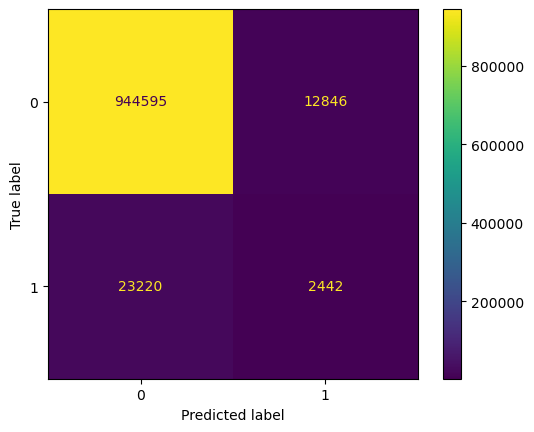

In [112]:
# confusion matrix for lowered threshold = .3
cm = confusion_matrix(result1[y_name], result1['TGT_pred'], labels=logis_reg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logis_reg.classes_)
disp.plot()
plt.show()

In [146]:
n = round((result1['TGT_pred'].count())*.50, 0).astype(int)
n

491552

In [147]:
# need to keep reading up on this
k_yhat = result1['TGT_pred'].sample(n=n, random_state=12345)
ks = ks_2samp(result1[y_name], k_yhat)
ks

KstestResult(statistic=0.010401774484757875, pvalue=3.165213450222744e-31, statistic_location=0, statistic_sign=-1)

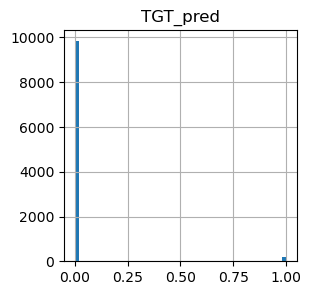

In [148]:
# probabilities distribution
_ = pd.DataFrame(yhat).hist(bins=50, figsize=(3, 3))

### Phase 2 Feature Selection

In [149]:
# viewing average gift amount in training data (without TGTresp = 0 rows)
avg_tgt_gift = train_responders['TGTgiftamt'].mean()
avg_tgt_gift

33.9646840675564

In [150]:
# re-conduct feature seleciton for regression model
y_name = 'TGTgiftamt'
#y_name = 'log_y'
x_names = x_names_df.columns.tolist()

In [151]:
feature_sel = x_names
feature_sel.remove('masterprimaryid')

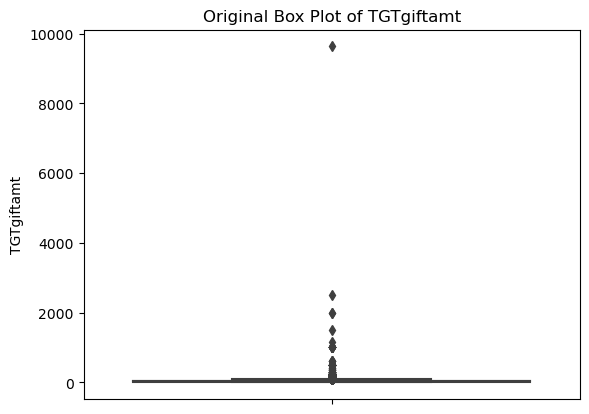

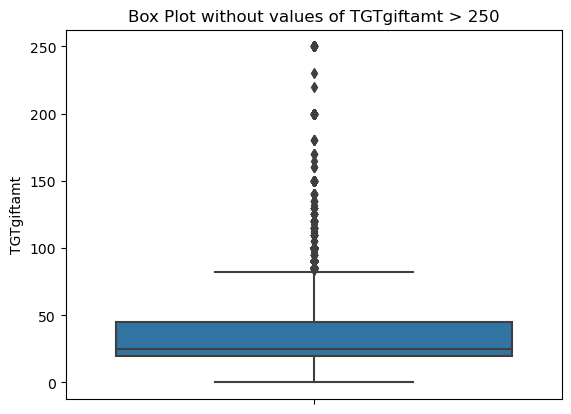

In [152]:
  
import seaborn as sns
import matplotlib.pyplot as plt
 
# viewing outliers
def removal_box_plot(df, column, threshold):
    sns.boxplot(data=df, y=column)
    plt.title(f'Original Box Plot of {column}')
    plt.show()
 
    removed_outliers = df[df[column] <= threshold]
 
    sns.boxplot(data=removed_outliers, y=column)
    plt.title(f'Box Plot without values of {column} > 250')
    plt.show()
    return removed_outliers
 
 
threshold_value = 250
 
no_outliers = removal_box_plot(train_responders, 'TGTgiftamt', threshold_value)

In [153]:
# manipulating training data to use value of 250 for rows where TGTgiftamt > 250
train_responders.loc[train_responders['TGTgiftamt'] >= 250, 'TGTgiftamt'] = 250
ctr = 0
for index, row in train_responders.iterrows():
    if row["TGTgiftamt"] == 250:
        ctr += 1
print(ctr)

129


In [154]:
dtkbest = make_pipeline(SelectKBest(k=10), DecisionTreeRegressor(random_state=12345))
dtkbest.fit(train_responders[feature_sel], train_responders[y_name])

/Users/kylieloudermilk/Desktop/DNSC_6317/Project/venv/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [80 91 97] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/kylieloudermilk/Desktop/DNSC_6317/Project/venv/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


Pipeline(steps=[('selectkbest', SelectKBest()),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=12345))])

['append_religion' 'append_trans_life' 'append_NetWorth'
 'append_WealthResources' 'append_mt_CultureArtsEvents' 'cumul_amount'
 'first_gift_amount' 'HPG_amount' 'MRG_amount' 'avg_gift_amt']


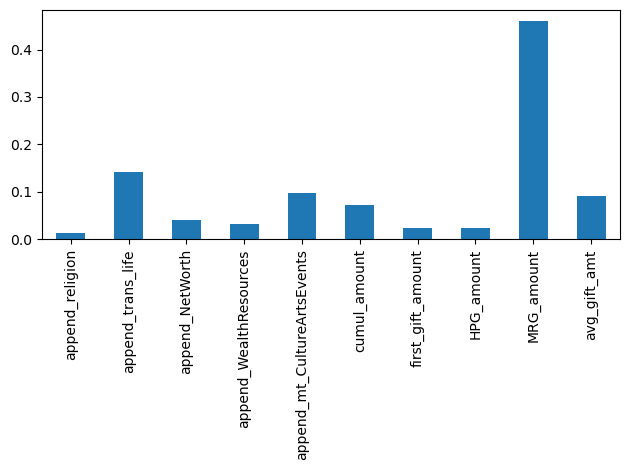

In [155]:
index_features = dtkbest[:-1].get_feature_names_out()
pd.Series(dtkbest[-1].feature_importances_, index=index_features).plot.bar()
plt.tight_layout()
print(dtkbest[:-1].get_feature_names_out())

### Phase 2 Models

In [156]:
# temp selected features
x_names_2 = ['HPG_amount',
 'MRG_amount',
 'cumul_amount',
 'avg_gift_amt',
 'first_gift_amount',
 'append_WealthResources',
 'append_mt_HighDollarDonor',
 'append_dollar_life',
 'gift_count',
 'Monthsback',
 'append_HouseHoldEducation',
 'append_trans_life',
 'append_NetWorth',
 'append_mt_CultureArtsEvents',
 'append_direct_trans',
 'append_fundraisingpartners',
 'GivingYears']


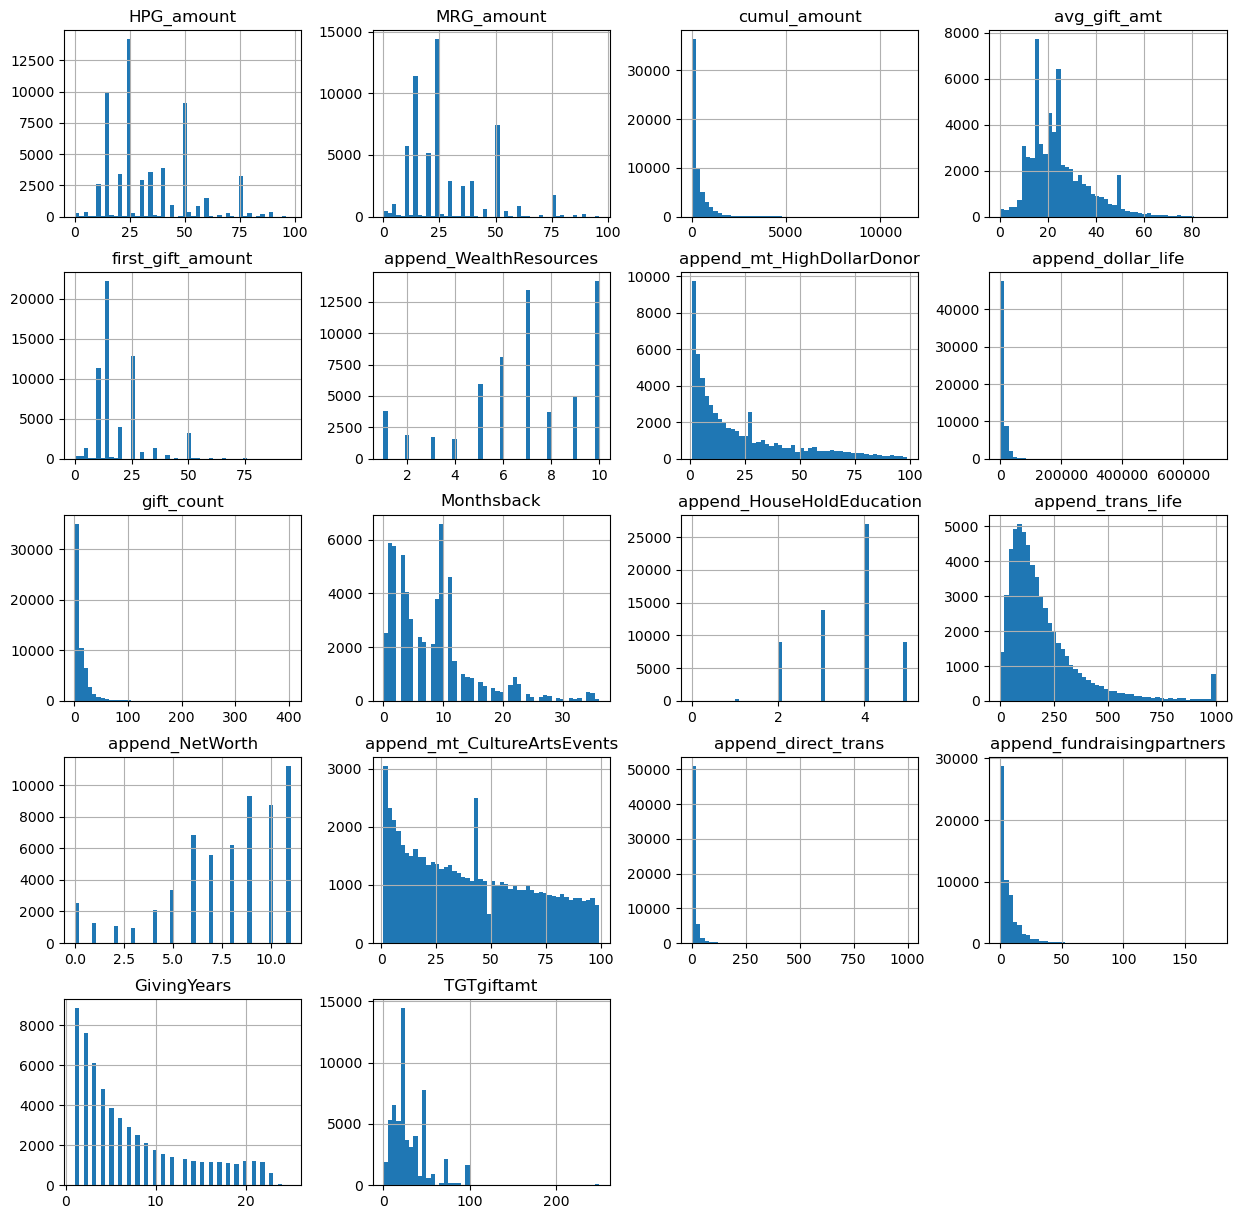

In [157]:
_ = train_responders[x_names_2 + ['TGTgiftamt']].hist(bins=50, figsize=(15, 15))

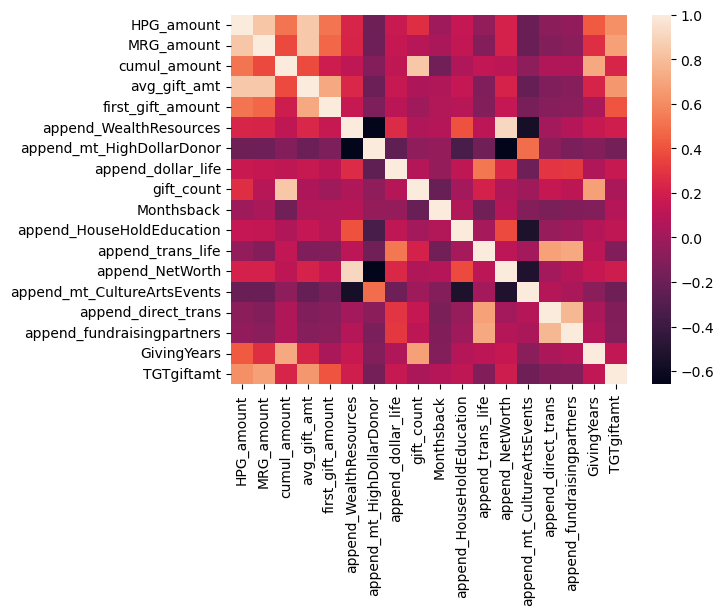

In [158]:
corr = train_responders[x_names_2 + ['TGTgiftamt']].corr()
_ = sns.heatmap(corr, 
                xticklabels=corr.columns.values,
                yticklabels=corr.columns.values)

/Users/kylieloudermilk/Desktop/DNSC_6317/Project/venv/anaconda3/lib/python3.11/site-packages/pandas/plotting/_matplotlib/core.py:509: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


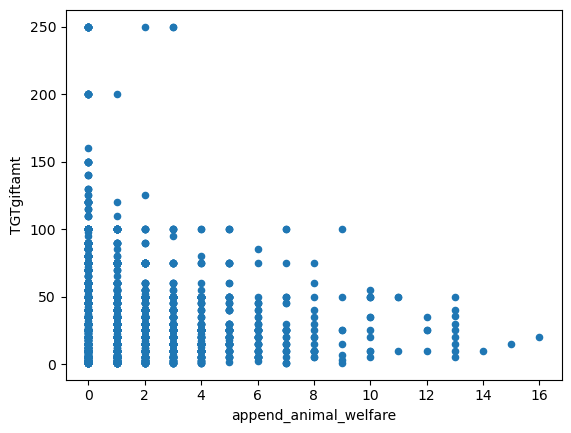

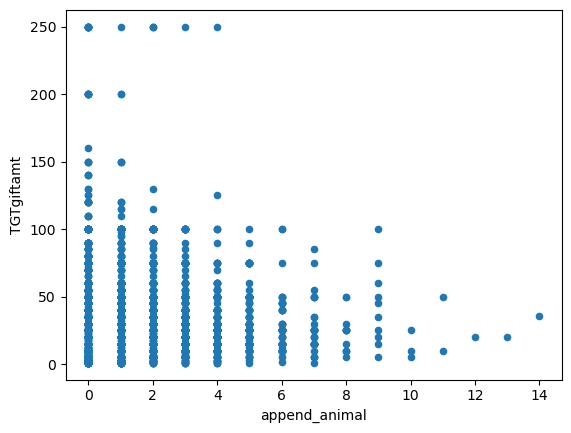

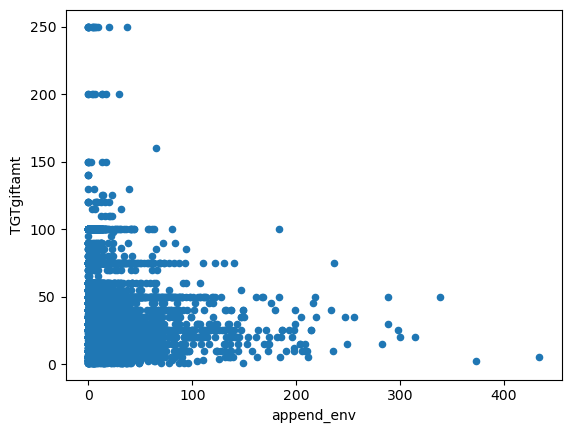

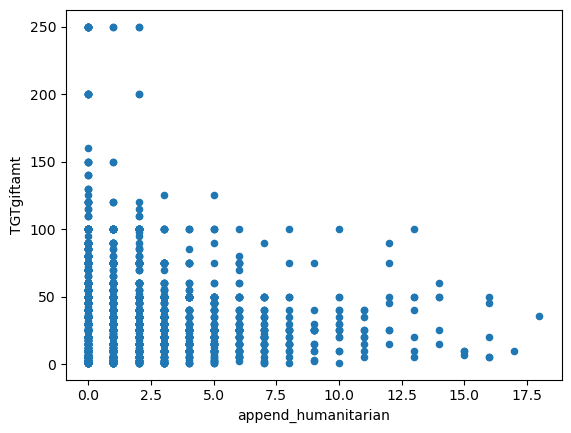

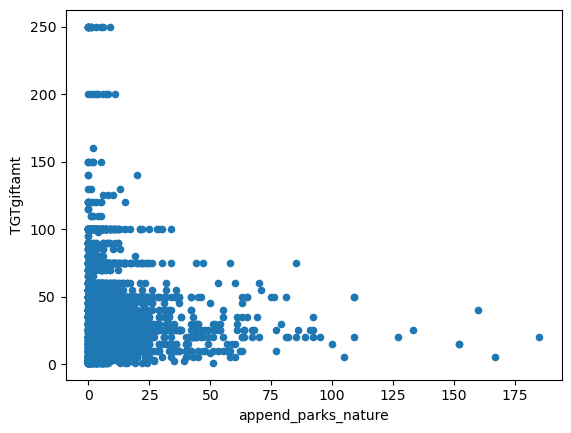

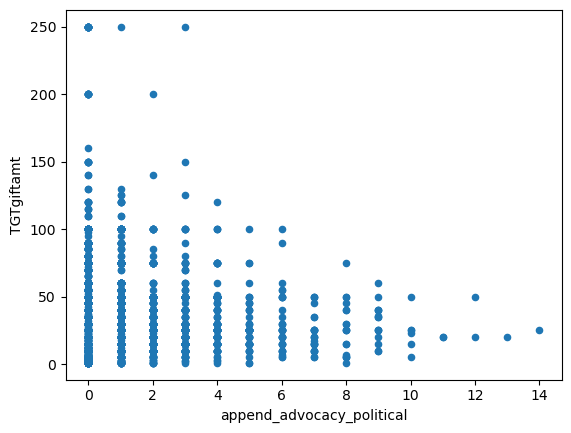

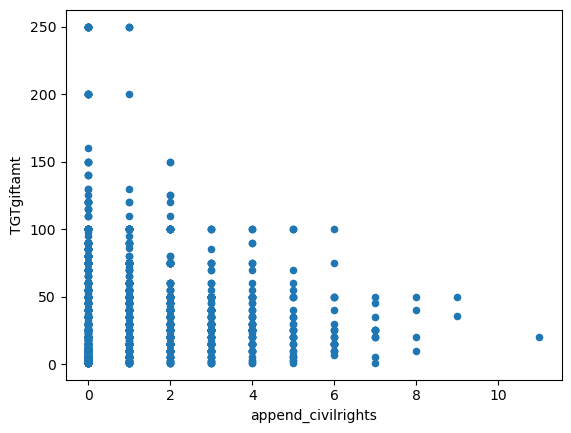

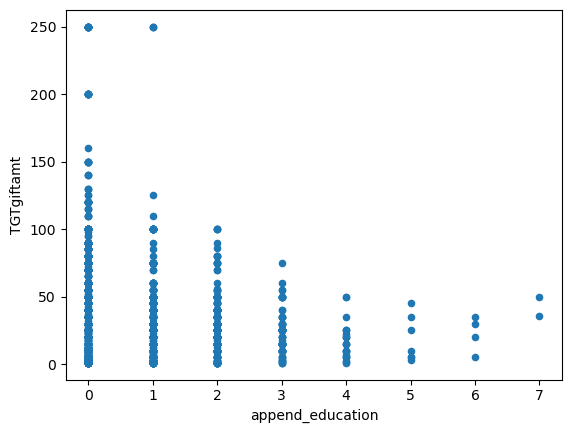

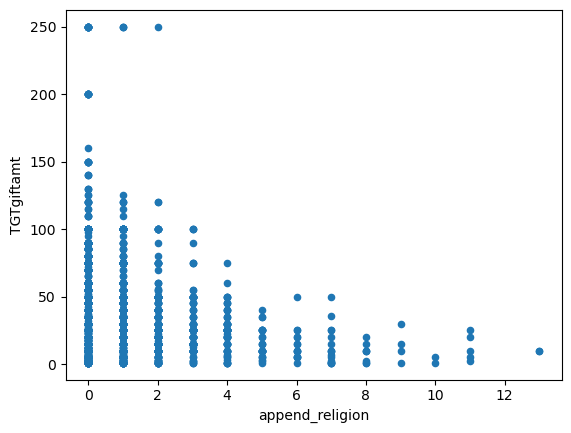

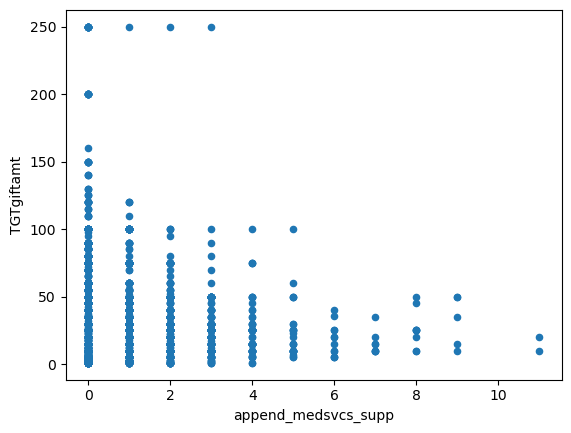

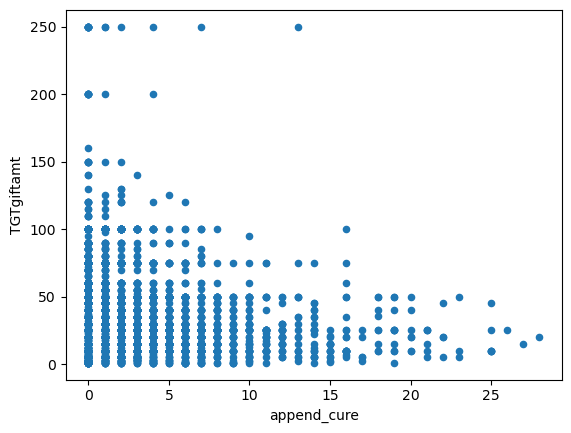

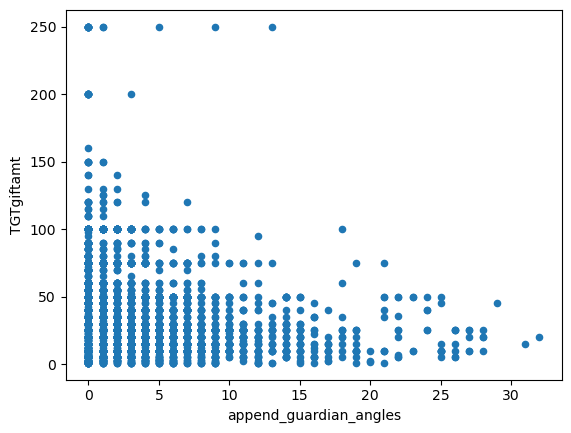

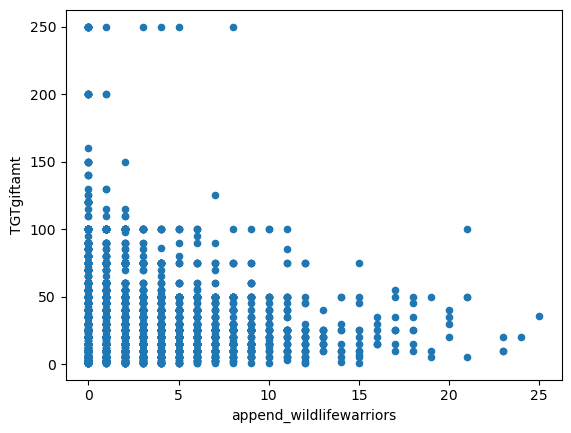

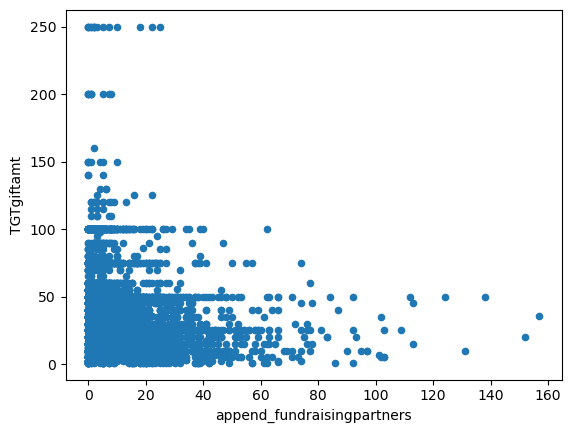

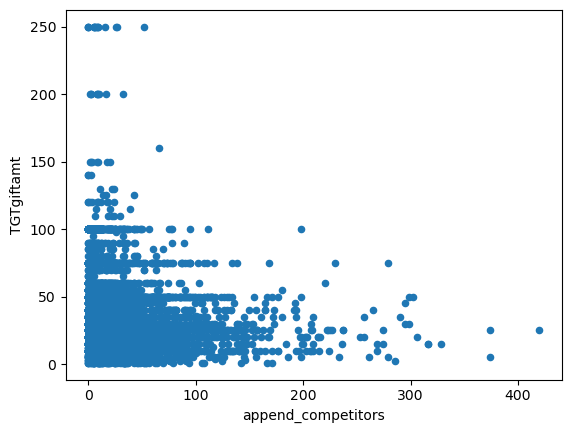

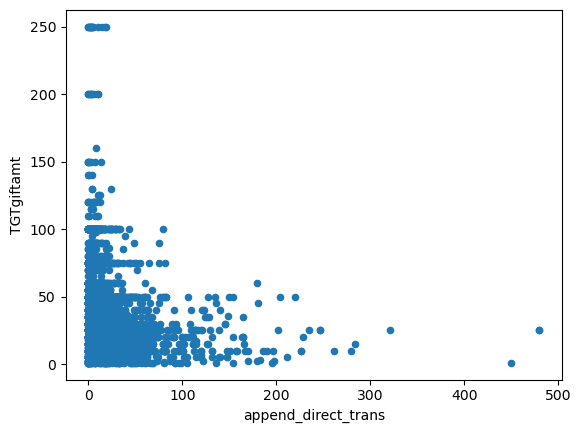

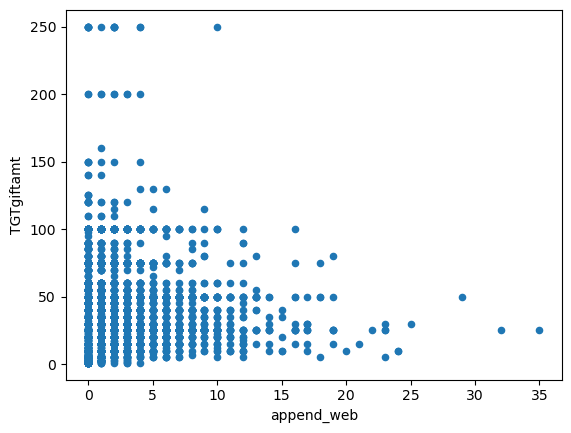

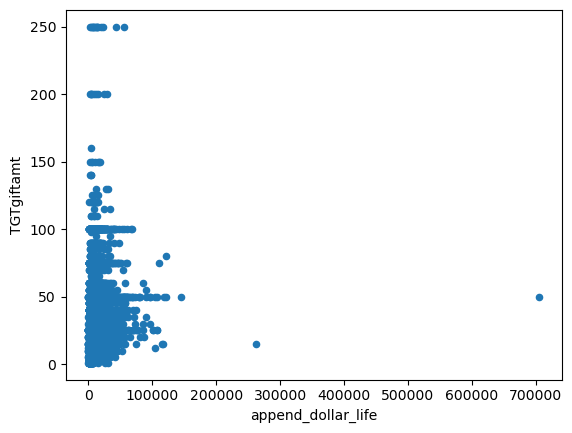

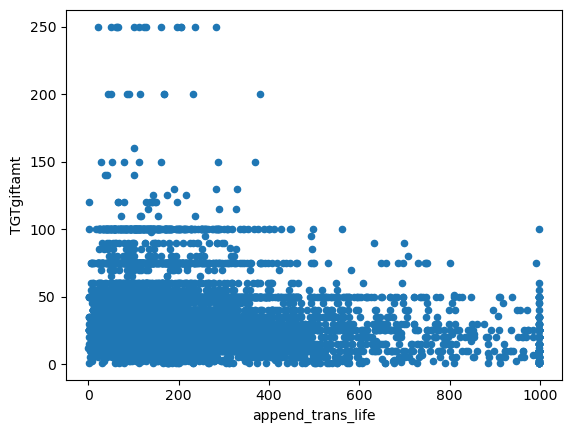

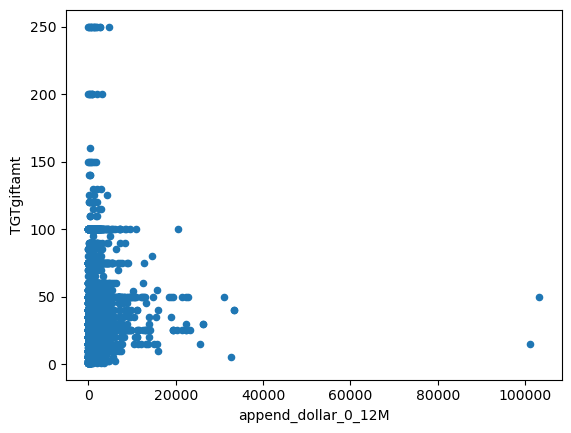

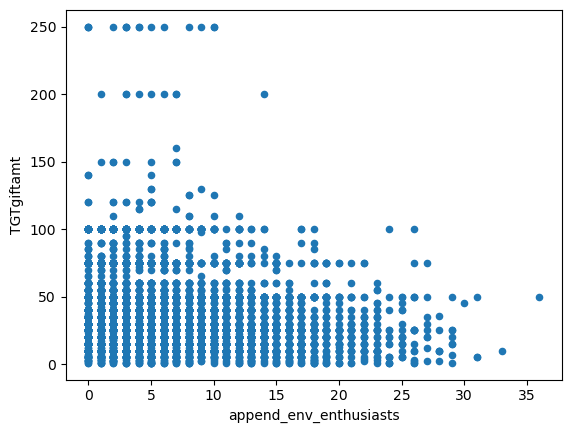

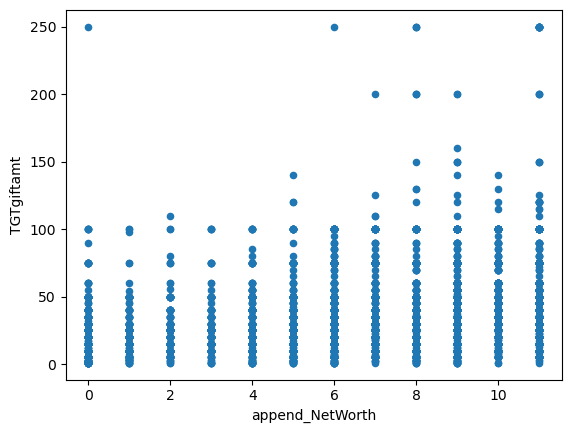

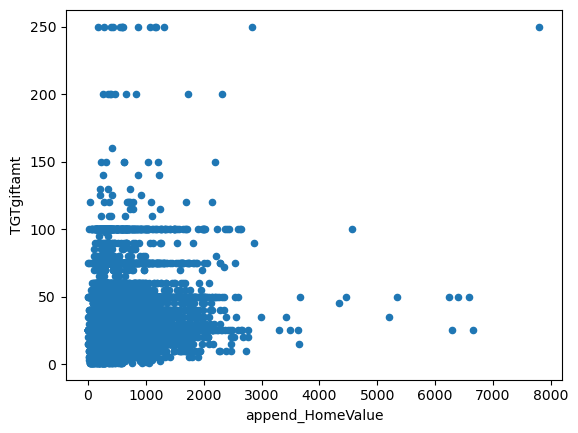

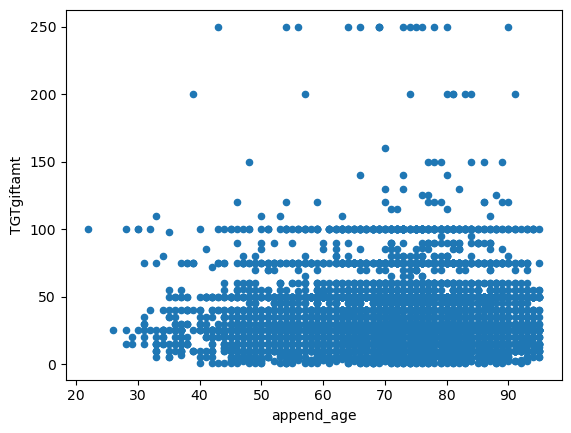

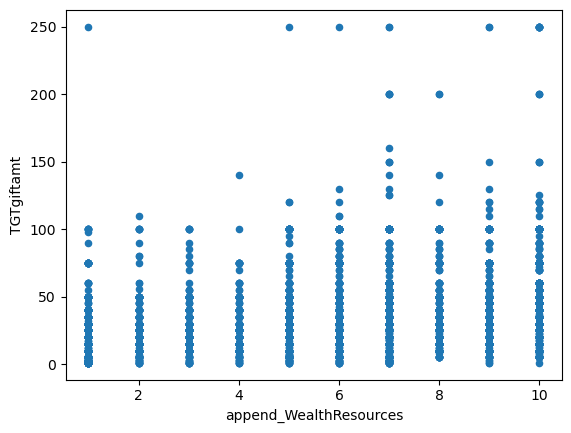

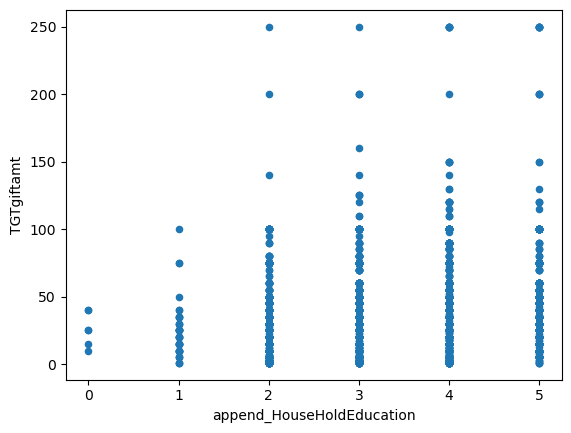

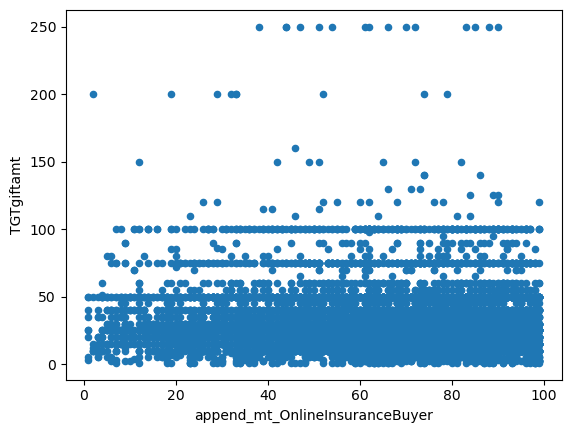

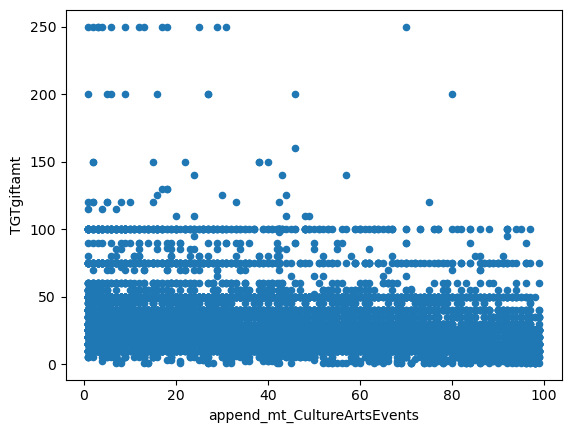

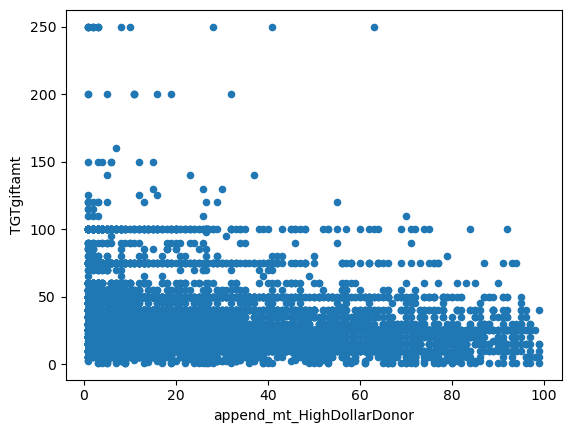

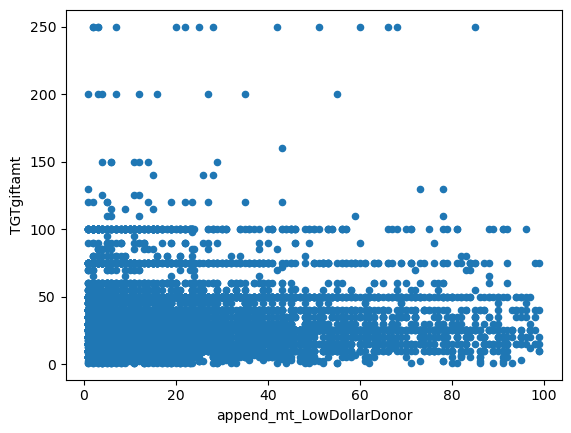

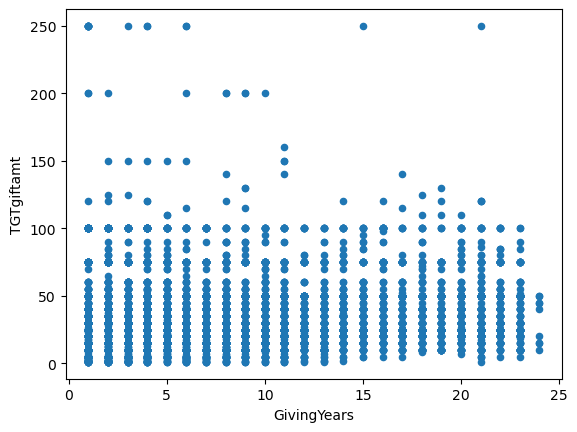

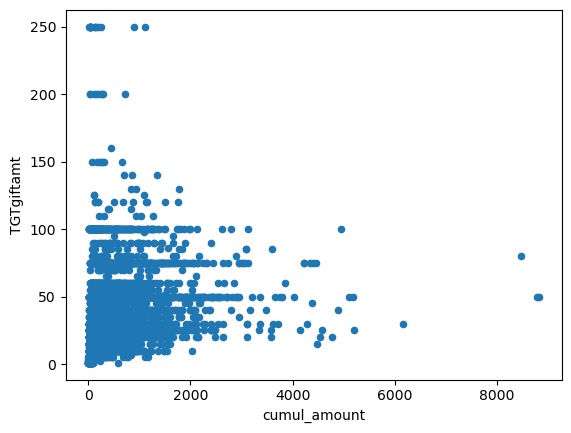

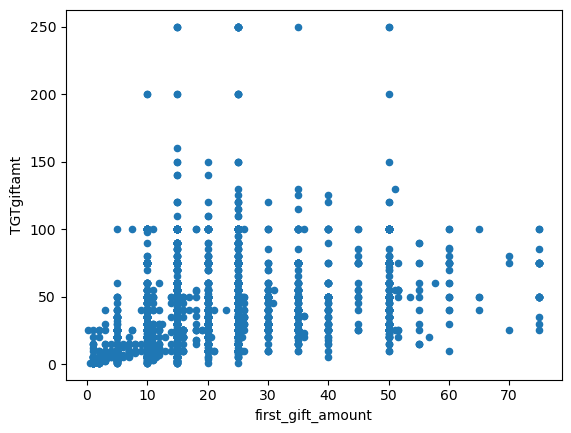

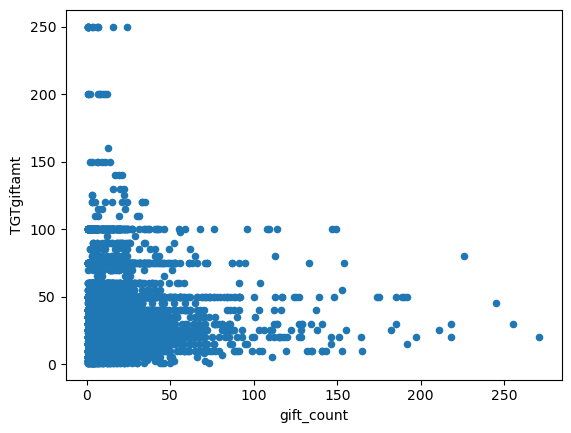

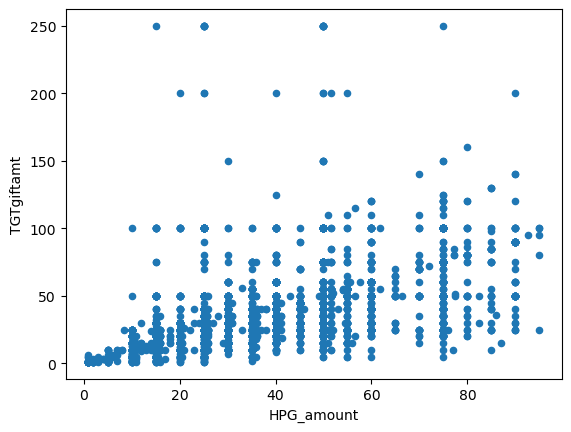

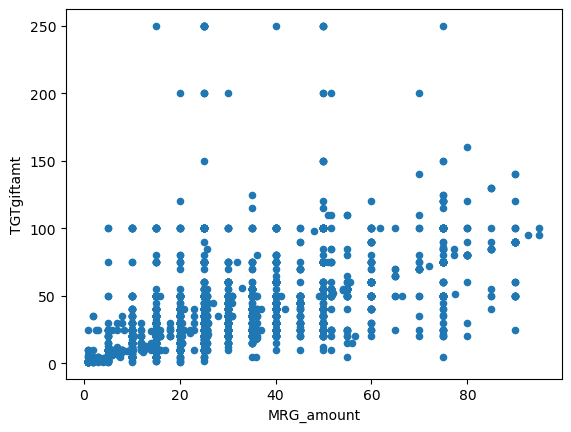

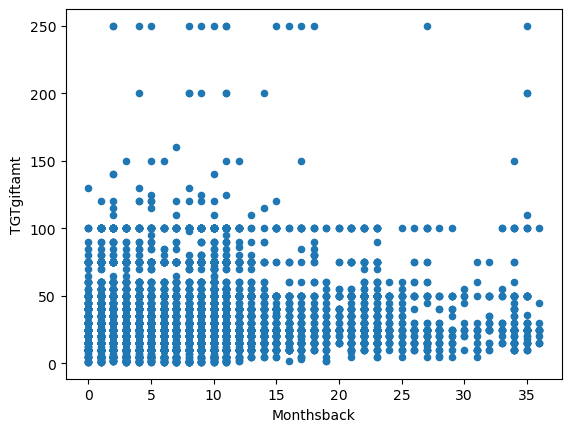

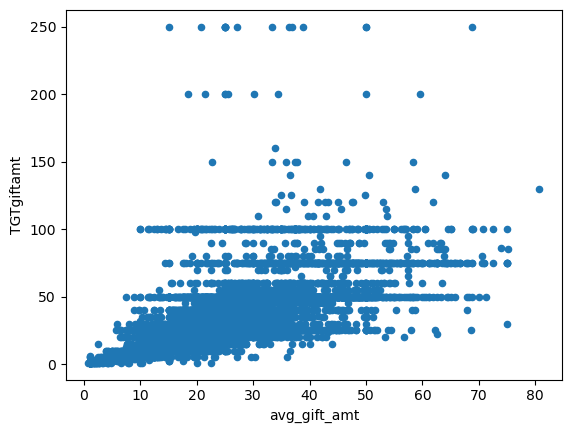

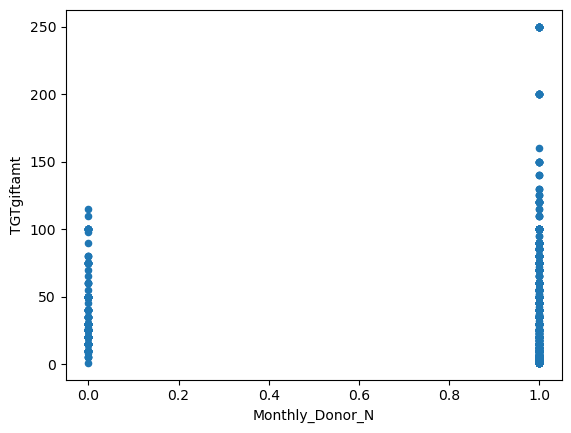

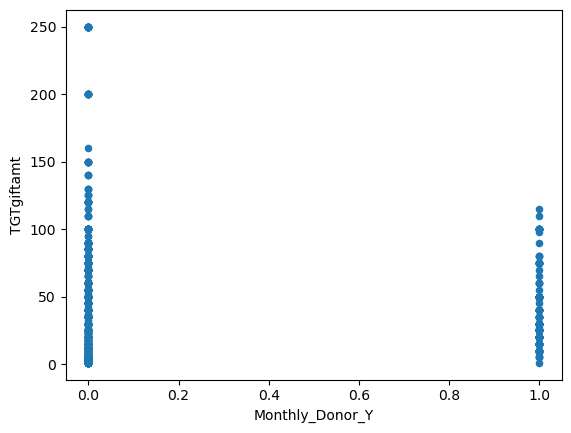

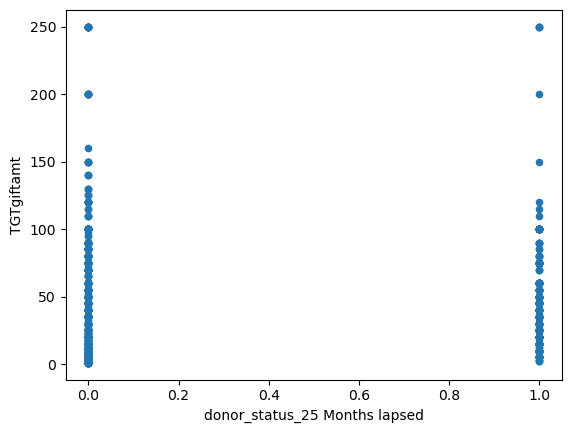

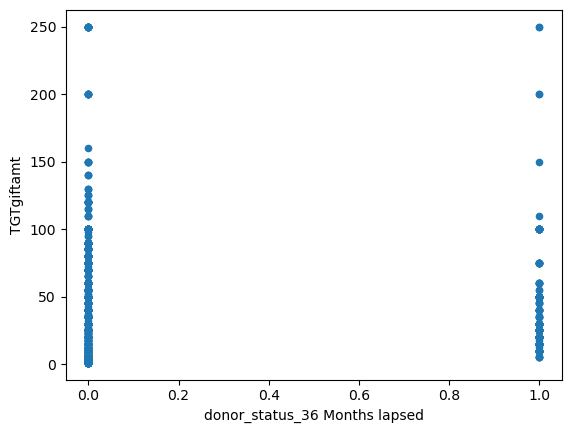

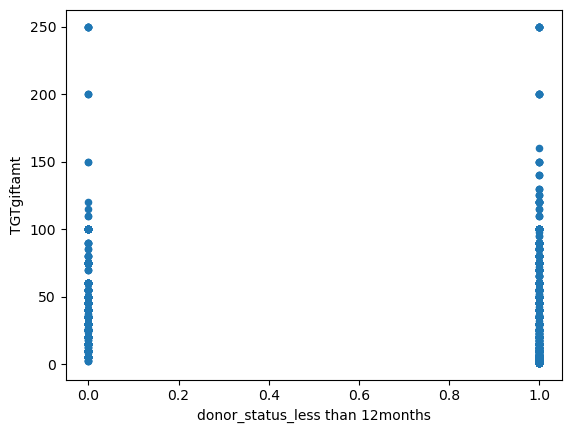

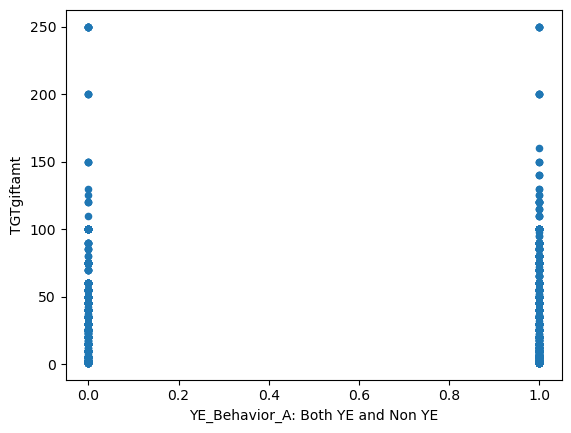

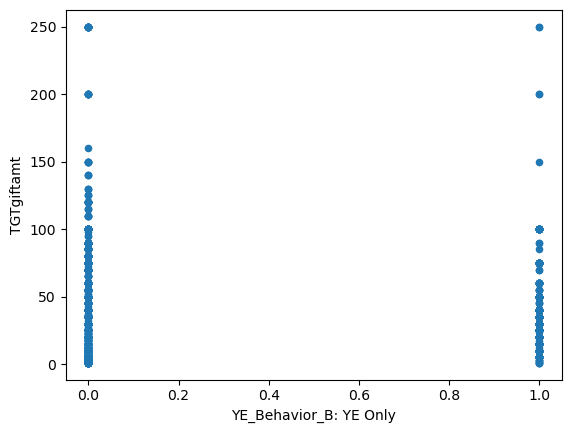

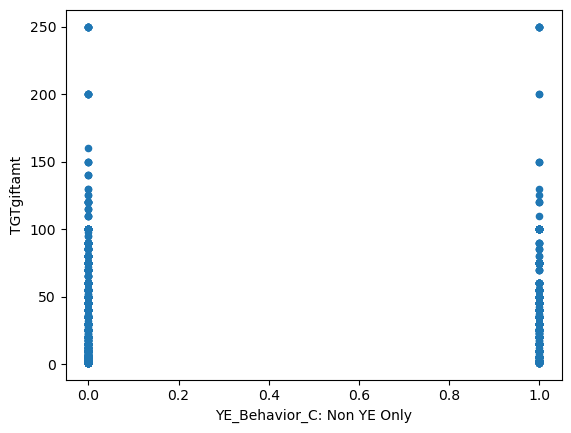

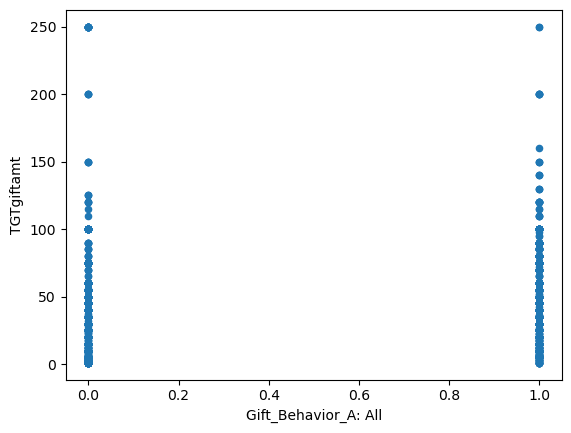

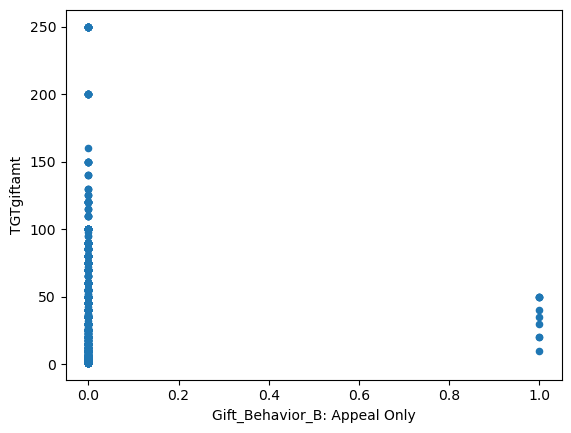

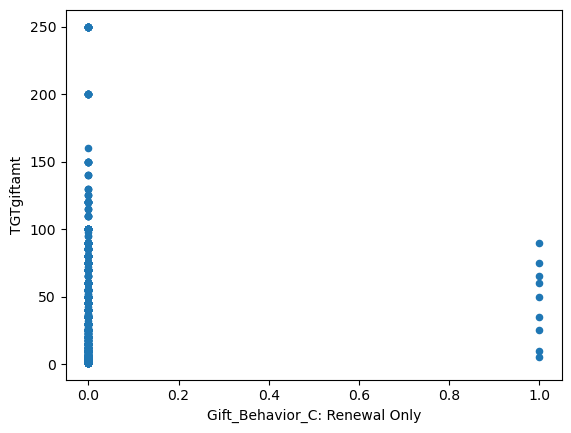

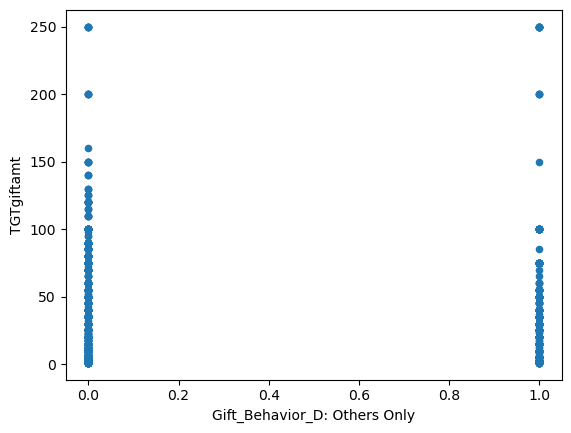

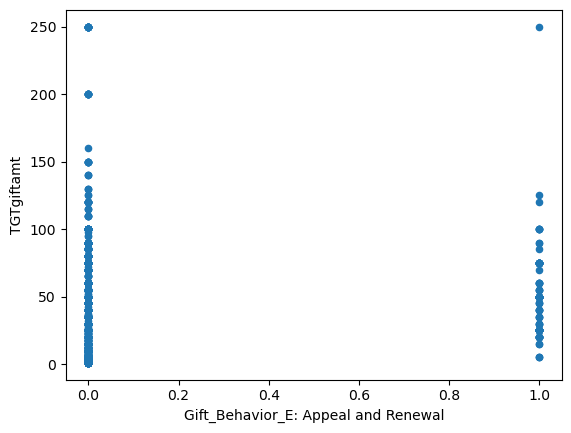

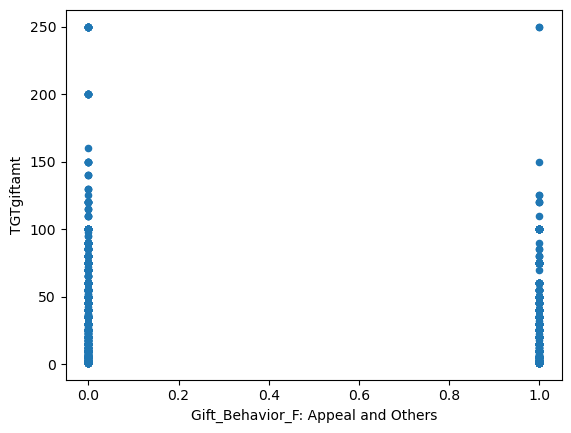

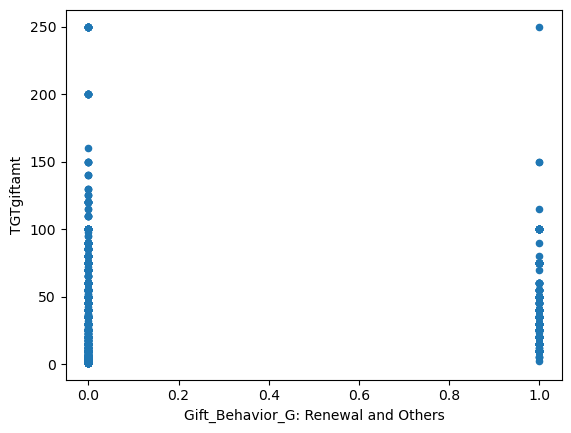

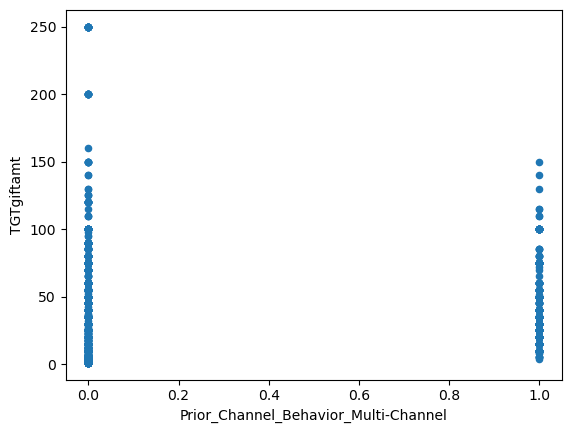

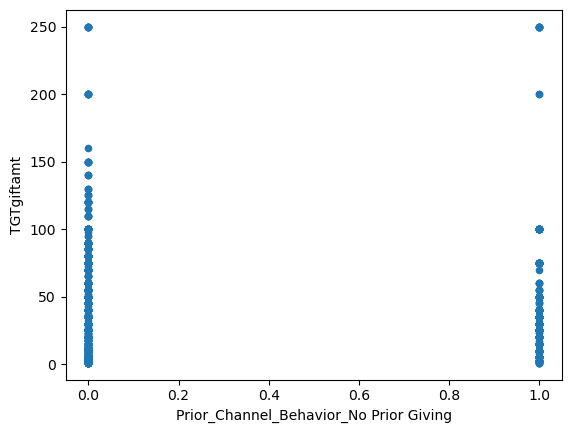

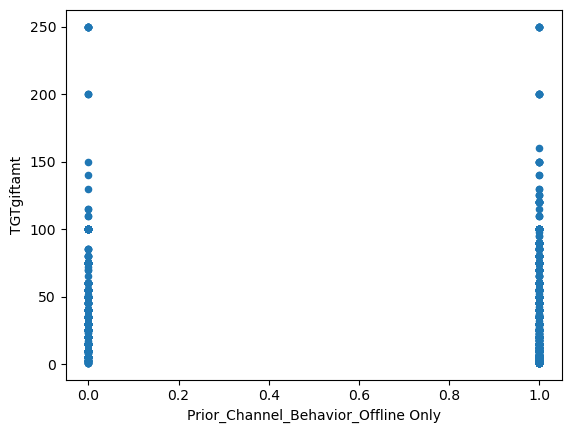

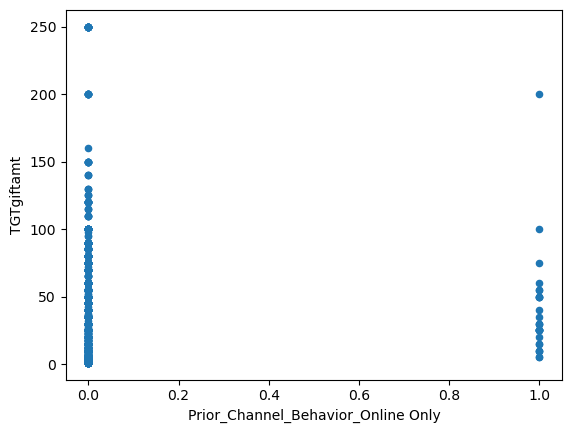

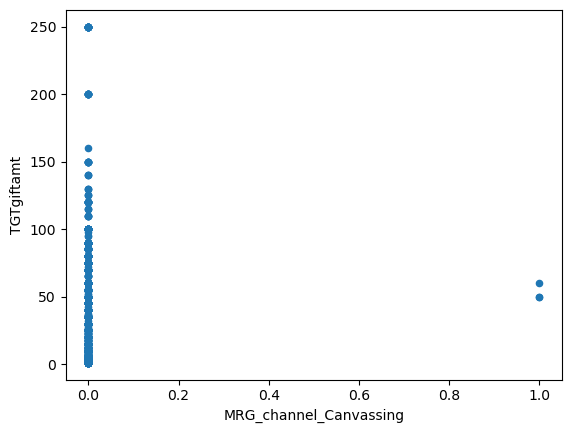

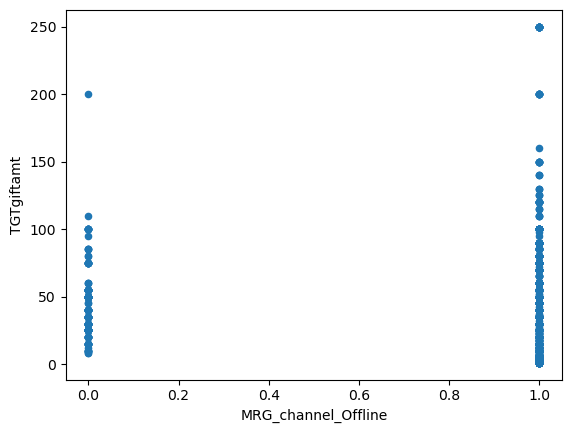

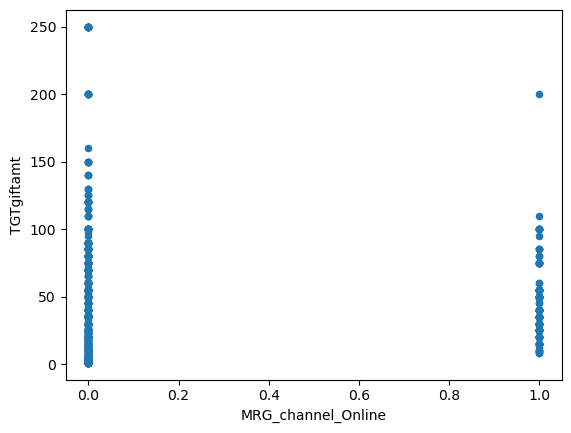

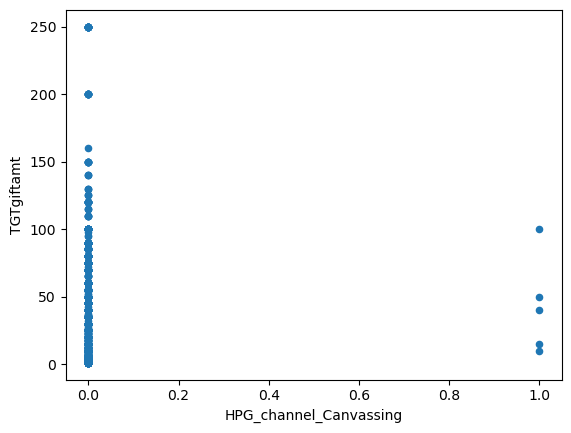

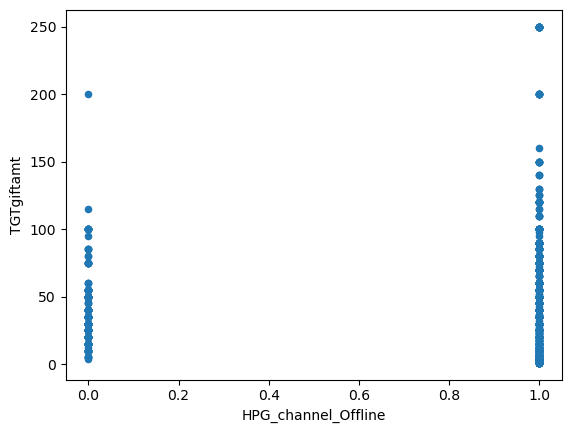

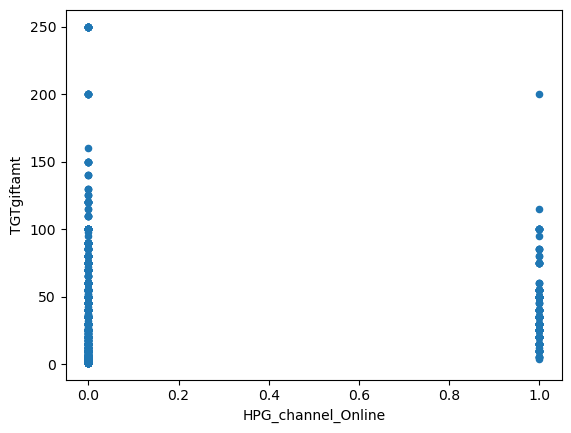

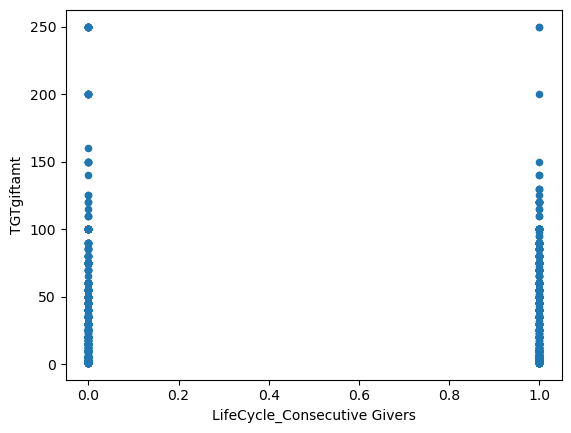

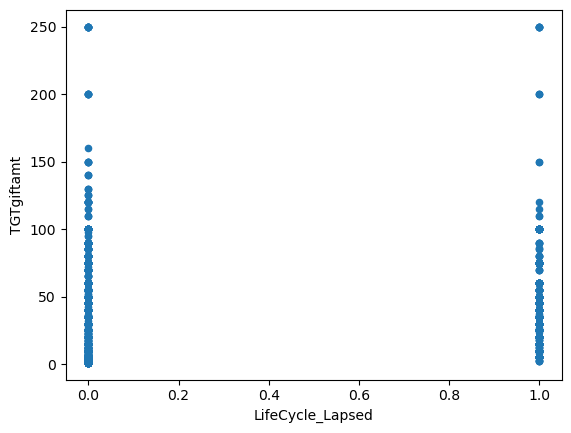

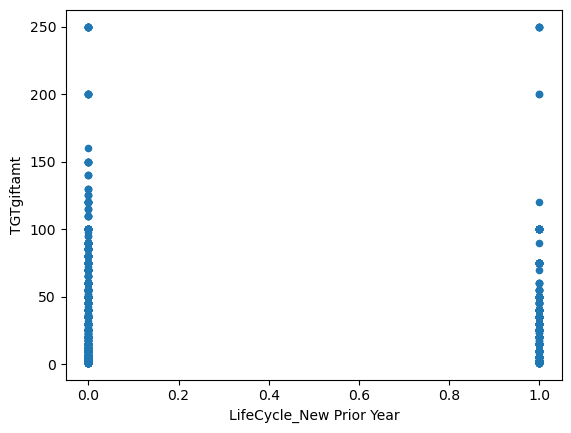

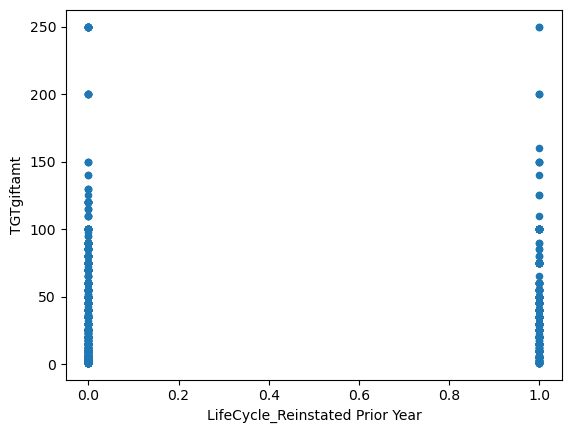

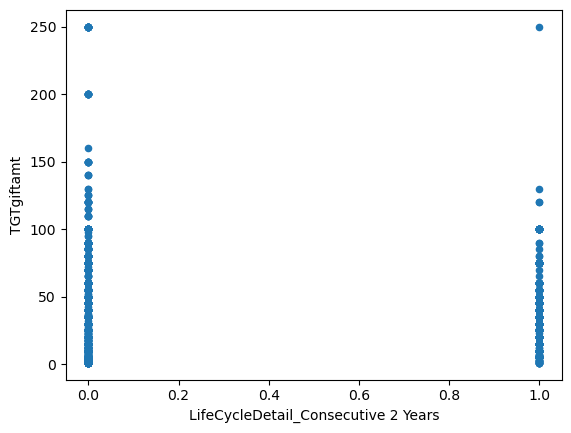

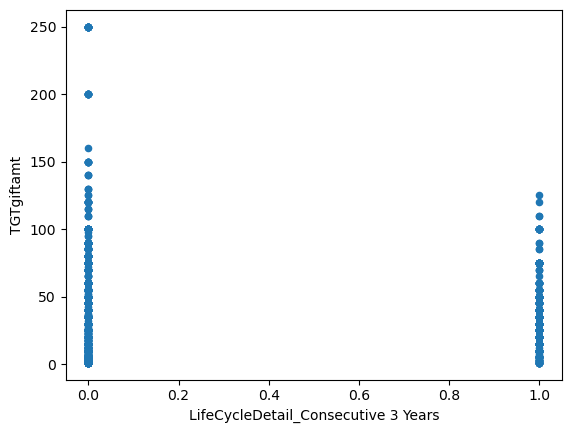

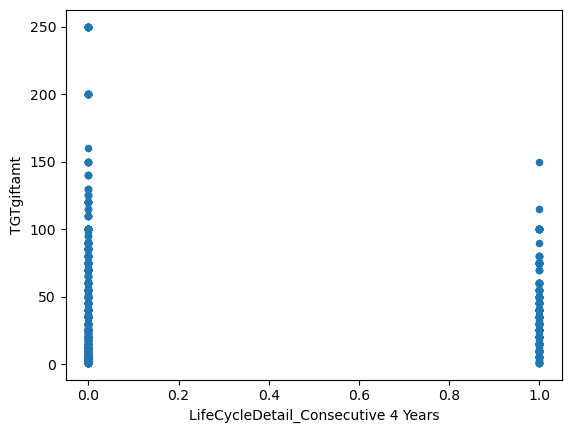

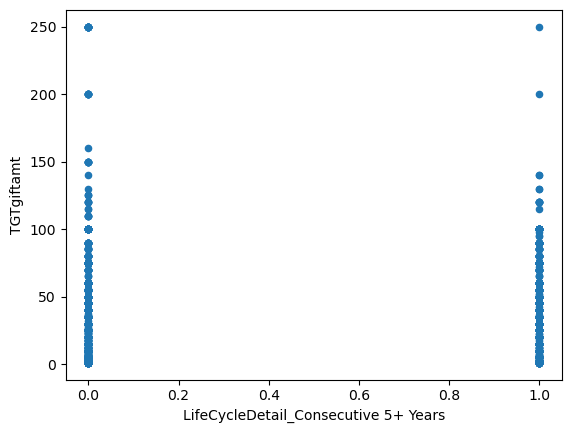

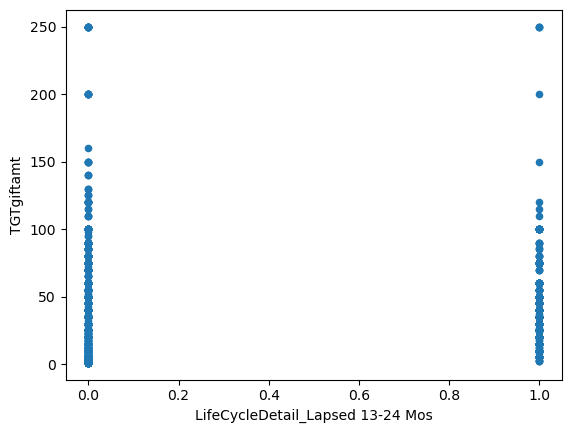

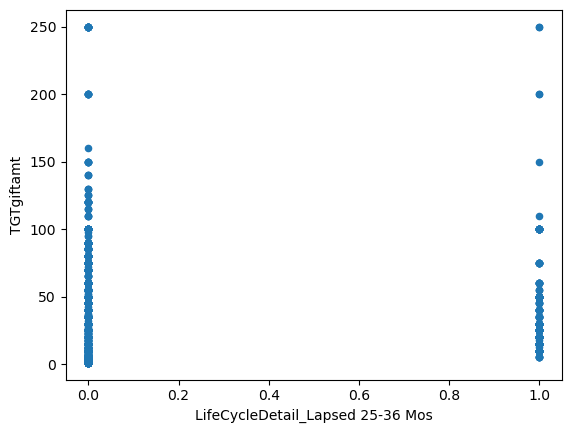

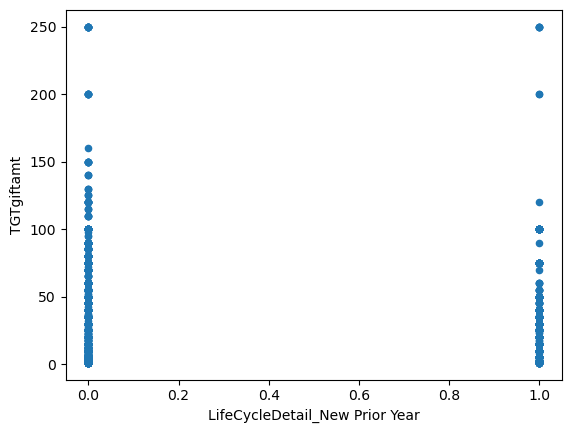

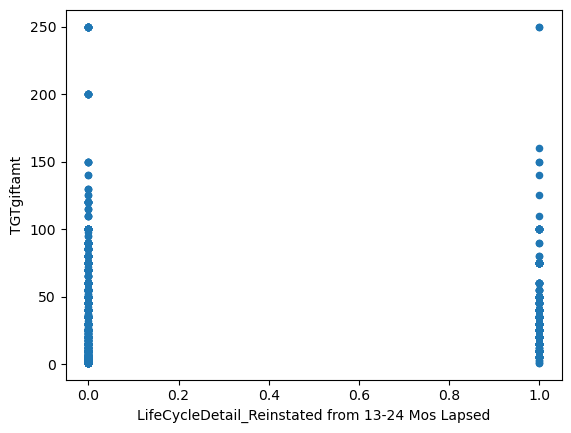

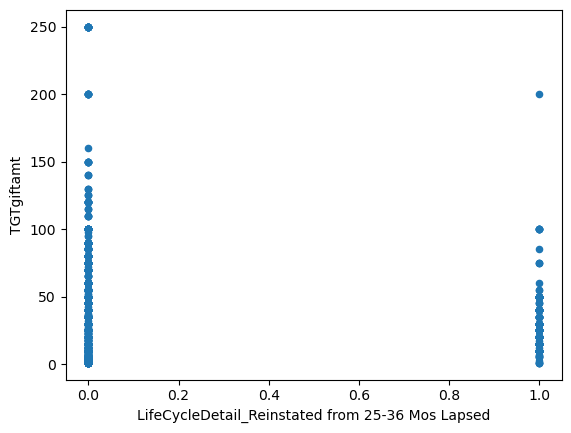

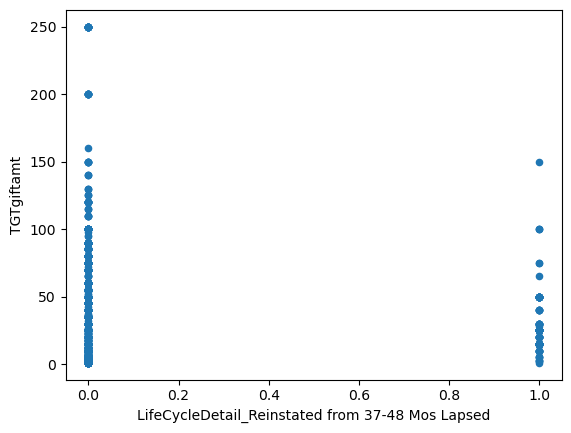

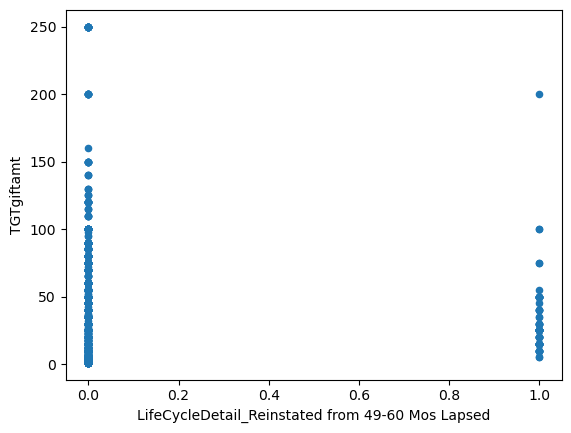

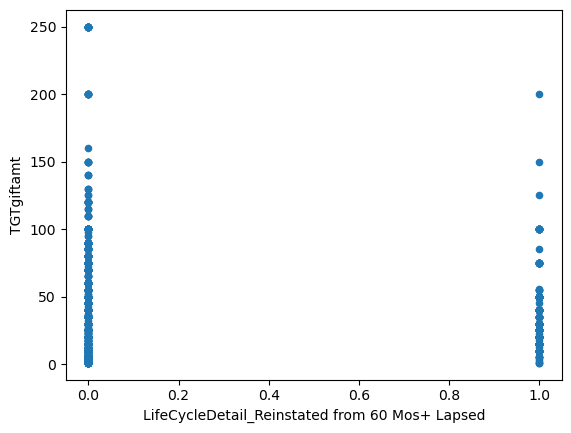

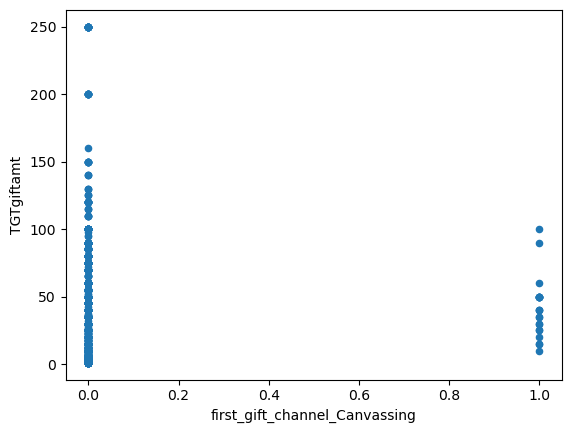

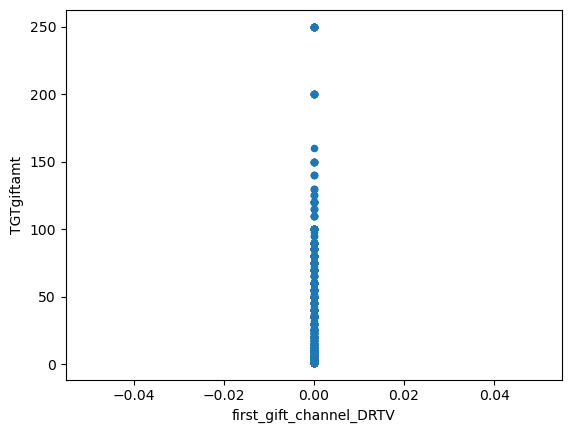

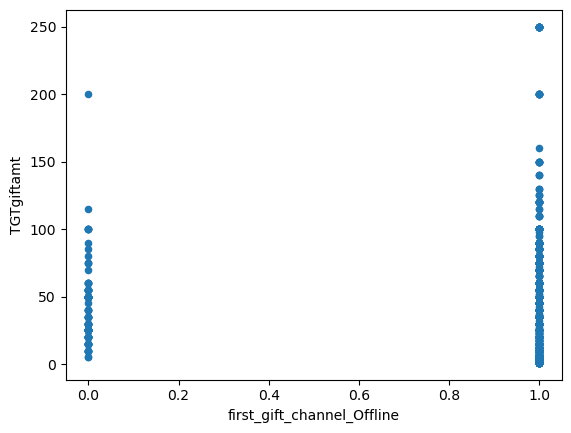

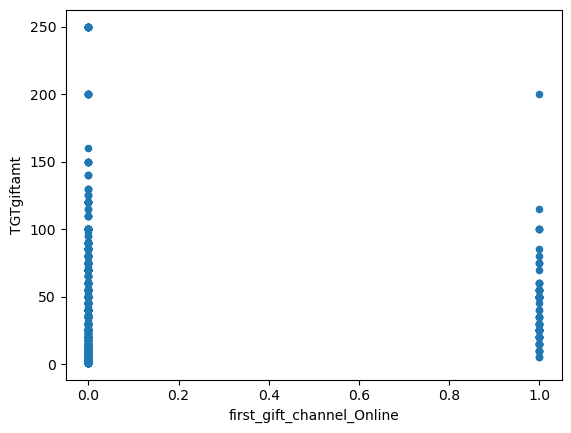

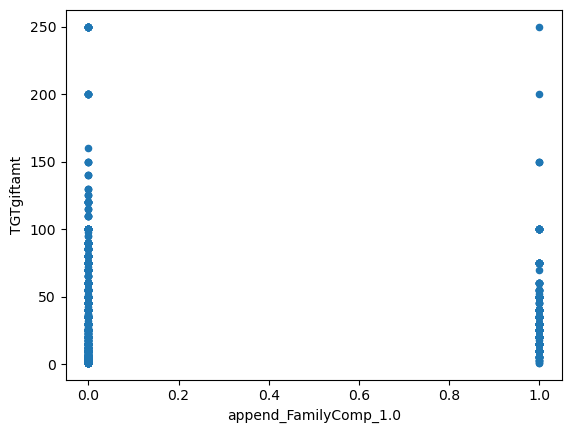

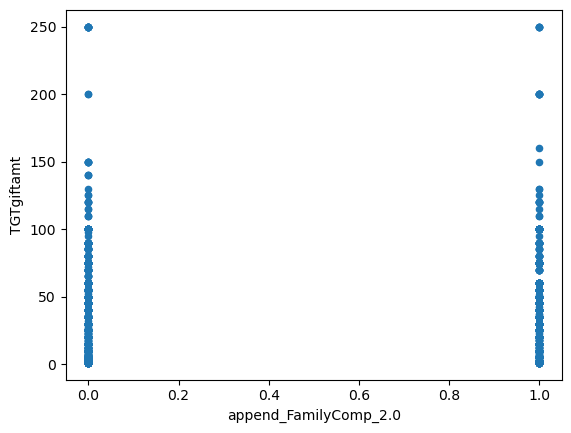

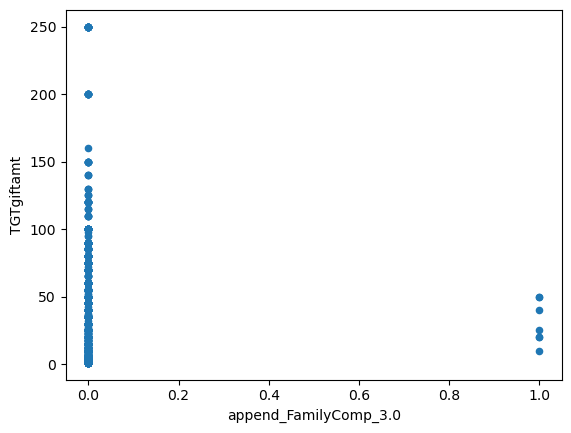

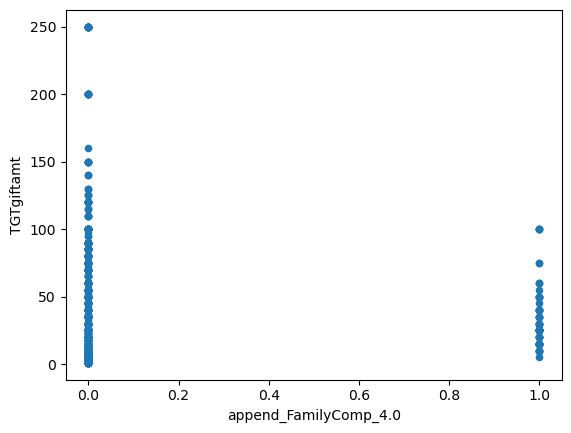

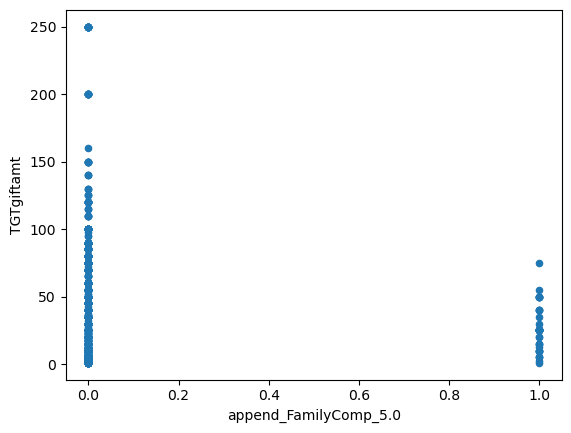

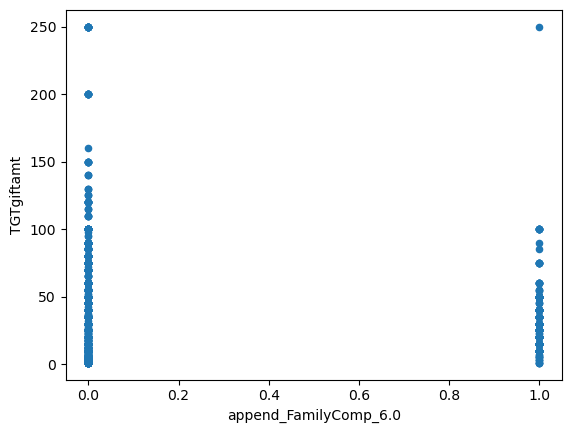

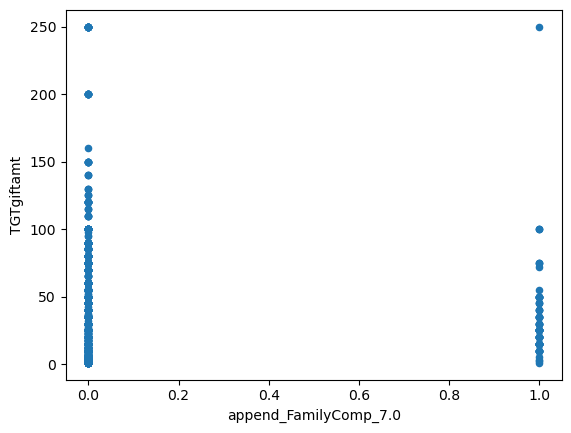

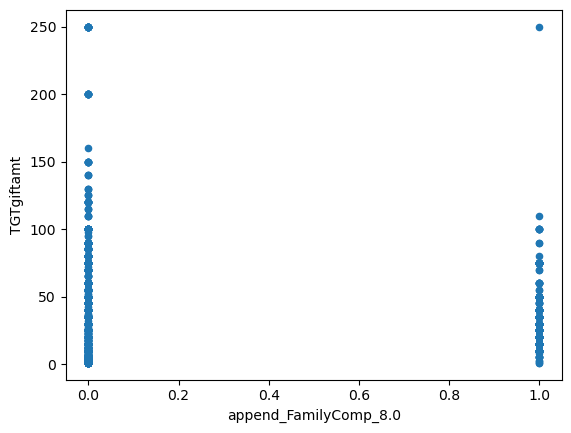

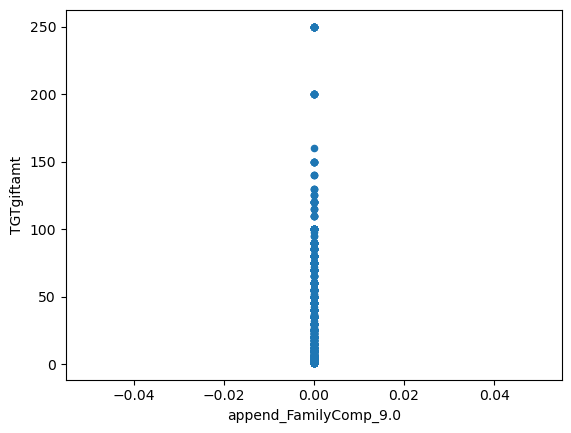

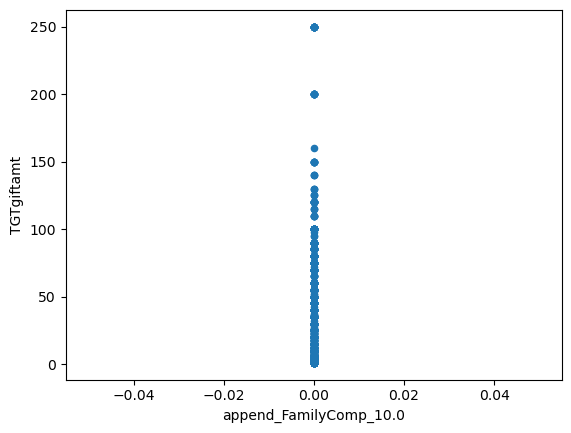

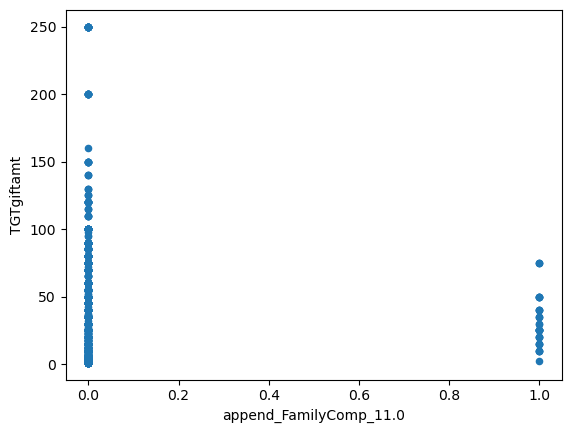

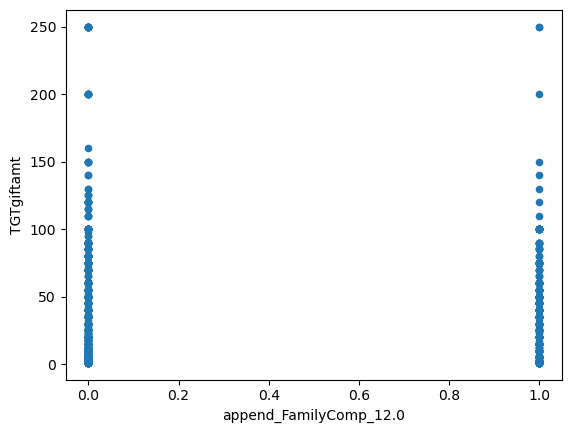

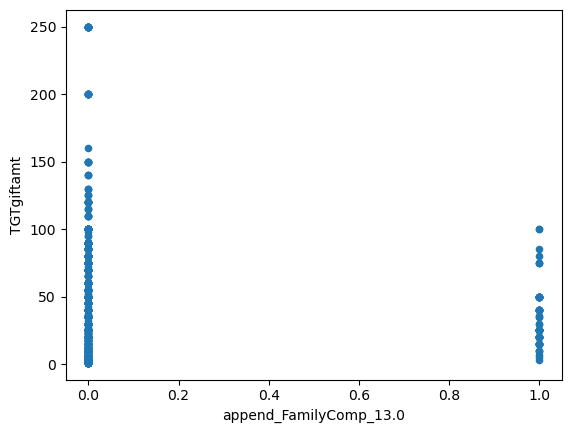

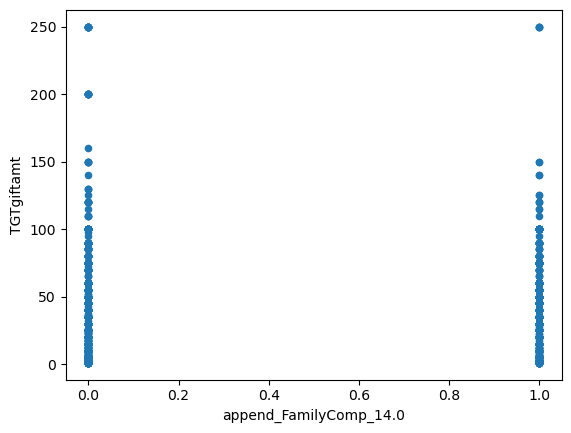

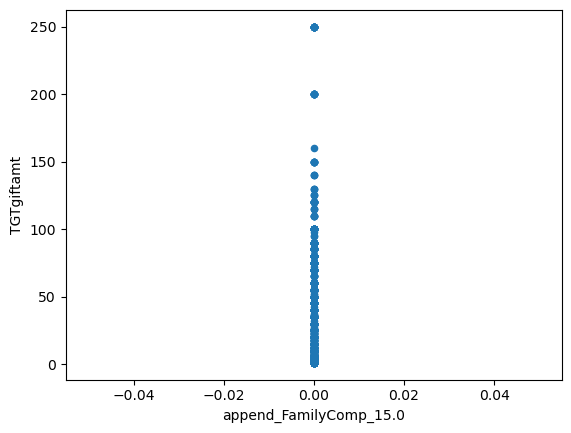

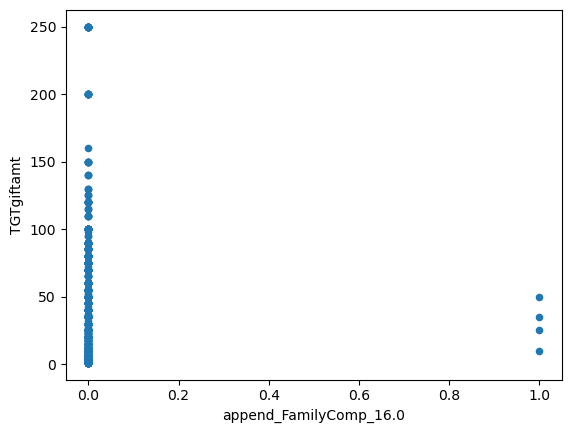

In [159]:
# reviewing relationships to TGTgiftamt
for x in x_names:
    train_responders.sample(n=10000, random_state=12345).plot(kind='scatter', x=x, y=y_name)

In [160]:
# final selected features
x_names_2 = ['HPG_amount',
 'MRG_amount',
 'avg_gift_amt',
 'first_gift_amount',
 'append_direct_trans',
 'append_fundraisingpartners',
 'append_HouseHoldEducation',
 'append_WealthResources',
 'append_age',
 'append_web',
 'append_competitors',
 'append_parks_nature']

In [ ]:
# dictionary of hyperparameter value lists for grid search
'''
model_params = {'max_depth': np.arange(1,50,1),
               'min_samples_leaf': np.arange(10,40,1),
               'min_samples_split': np.arange(2,10,1)}

# Decision Tree Regressor grid search
best_model = model_grid(train_responders, test_responders, x_names_2, y_name, DecisionTreeRegressor, model_params=model_params, n_models=200, 
                    seed=SEED)
print(best_model)'''

In [161]:
#rf = RandomForestRegressor(max_depth=37, min_samples_leaf=14, n_estimators=30,random_state=12345)
rf = RandomForestRegressor(random_state=12345)
rf.fit(train_responders[x_names_2], train_responders[y_name])

RandomForestRegressor(random_state=12345)

In [162]:
dt = DecisionTreeRegressor(random_state=12345)
dt.fit(train_responders[x_names_2], train_responders[y_name])

DecisionTreeRegressor(random_state=12345)

<Axes: title={'center': 'Random Forest Feature Importance'}>

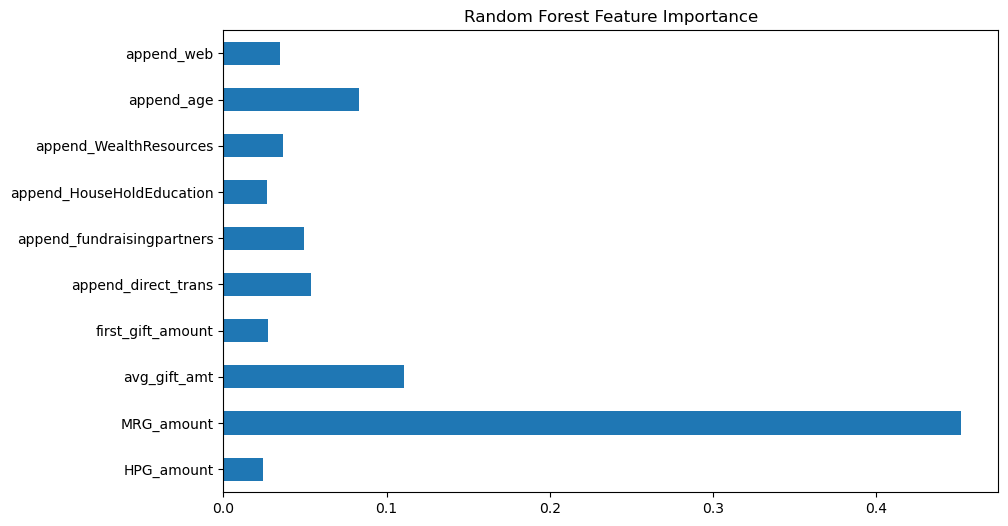

In [163]:
# random forest feature importance
plt.figure(figsize=(10,6))
(pd.Series(rf.feature_importances_[:10], rf.feature_names_in_[:10])
   .plot(title='Random Forest Feature Importance', kind='barh'))

<Axes: title={'center': 'Decision Tree Feature Importance'}>

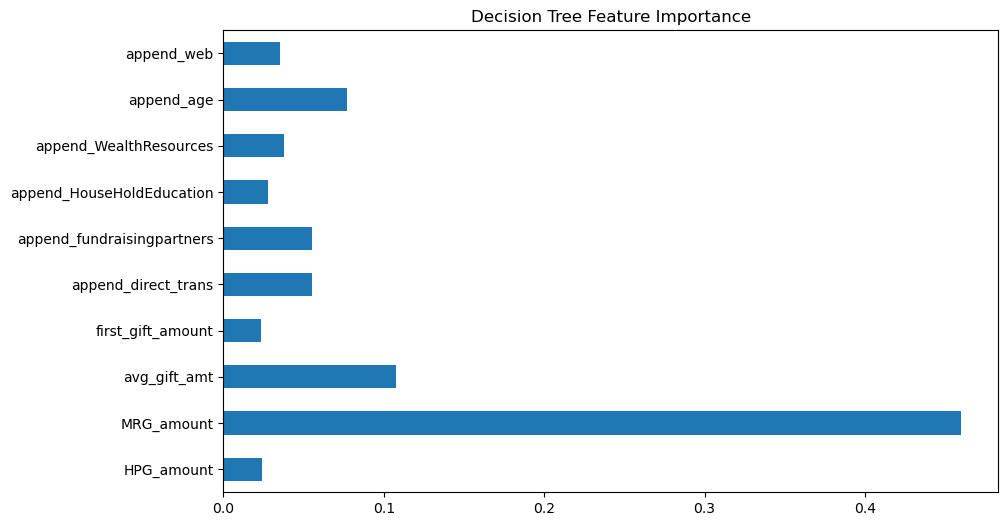

In [164]:
# decision tree feature importance
plt.figure(figsize=(10,6))
(pd.Series(dt.feature_importances_[:10], dt.feature_names_in_[:10])
     .plot(title='Decision Tree Feature Importance', kind='barh'))

In [165]:
# diagnostic and remediation imports
from sklearn.metrics import (mean_absolute_error, mean_squared_error)
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import QuantileTransformer

In [166]:
# prediction MAE and MSE for Random Forest
rf_test_ypred = rf.predict(test_responders[x_names_2])
rf_mae_test_ypred = round(mean_absolute_error(test_responders[y_name], rf_test_ypred),3)
print("Random Forest MAE: ", rf_mae_test_ypred)
rf_mse_test_ypred = round(mean_squared_error(test_responders[y_name], rf_test_ypred),3)
print("Random Forest MSE: ", rf_mse_test_ypred)
print("Random Forest y predictions mean for test data: ", rf_test_ypred.mean())

Random Forest MAE:  11.02
Random Forest MSE:  3015.371
Random Forest y predictions mean for test data:  34.10299021821615


In [167]:
# prediction MAE and MSE for Decision Tree
dt_test_ypred = dt.predict(test_responders[x_names_2])
dt_mae_test_ypred = round(mean_absolute_error(test_responders[y_name], dt_test_ypred),3)
print("Decision Tree MAE: ", dt_mae_test_ypred)
dt_mse_test_ypred = round(mean_squared_error(test_responders[y_name], dt_test_ypred),3)
print("Decision Tree MSE: ", dt_mse_test_ypred)
print("Decision Tree y predictions mean for test data: ", dt_test_ypred.mean())

Decision Tree MAE:  13.909
Decision Tree MSE:  3347.908
Decision Tree y predictions mean for test data:  33.88230678305147


In [168]:
# transformed target regressor - Random Forest
trans_rf = TransformedTargetRegressor(regressor=rf, transformer=QuantileTransformer(output_distribution='normal'))
trans_rf.fit(train_responders[x_names_2], train_responders[y_name])
rf_trans_yhat = trans_rf.predict(test_responders[x_names_2])
print("Random Forest Transformed test data Regressor MAE: ",round(mean_absolute_error(test_responders[y_name], rf_trans_yhat), 2))
print("Random Forest Transformed test data Regressor MSE: ",round(np.sqrt(mean_squared_error(test_responders[y_name], rf_trans_yhat)),2))

Random Forest Transformed test data Regressor MAE:  9.94
Random Forest Transformed test data Regressor MSE:  55.05


In [169]:
# transformed target regressor - Decision Tree
trans_dt = TransformedTargetRegressor(regressor=dt, transformer=QuantileTransformer(output_distribution='normal'))
trans_dt.fit(train_responders[x_names_2], train_responders[y_name])
dt_trans_yhat = trans_dt.predict(test_responders[x_names_2])
print("Decision Tree Transformed Regressor test data MAE: ",round(mean_absolute_error(test_responders[y_name], dt_trans_yhat), 2))
print("Decision Tree Transformed Regressor test data MSE: ",round(np.sqrt(mean_squared_error(test_responders[y_name], dt_trans_yhat)),2))

Decision Tree Transformed Regressor test data MAE:  14.03
Decision Tree Transformed Regressor test data MSE:  57.87


In [170]:
# storing random forest predictions in dataframe for visualization
df = pd.DataFrame(train_responders[[y_name, 'masterprimaryid']])
df['pred'] = abs(trans_rf.predict(train_responders[x_names_2]))
df

,TGTgiftamt,masterprimaryid,pred
75,80.0,000136CC-D469-4445-BB7C-6B7F05C36E04,75.0
128,5.0,00026531-DC7A-4A10-A63A-86CFA19829A6,1.0
149,25.0,0002F58D-87F3-4AA4-A9A9-0EB48427124C,25.0
209,15.0,0003F6B2-437C-4EB3-95F6-B9D9E7263BB8,15.0
225,25.0,00043A08-D7D4-4B7C-ACC0-F56F470E08D4,25.0
...,...,...,...
3276322,25.0,FFF9CC6C-81F2-4D28-B928-03C41696783D,25.0
3276416,40.0,FFFB7D3A-BAED-410E-AE52-5322FB71464B,40.0
3276505,50.0,FFFD2D21-AA65-4FA4-B885-B2A015D72E1D,50.0
3276538,10.0,FFFE0FCC-B7BF-41EB-8EEB-FB48FE08A169,15.0


(0.0, 250.0)

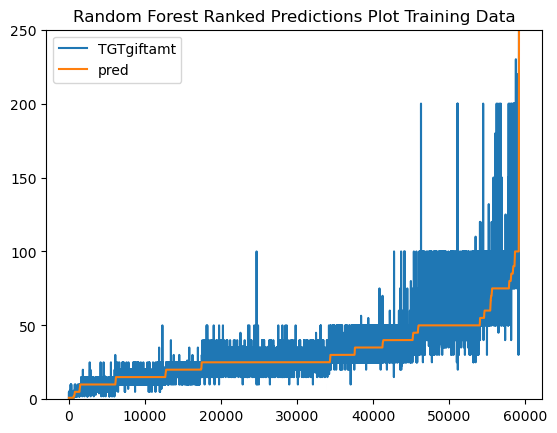

In [171]:
# visualizing performance of random forest
df.sort_values(by='pred', inplace=True)
df.reset_index(inplace=True, drop=True)
df.plot(title='Random Forest Ranked Predictions Plot Training Data')
plt.ylim((0,250))

<Axes: title={'center': 'Random Forest Actual vs. Predictions'}, xlabel='TGTgiftamt', ylabel='pred'>

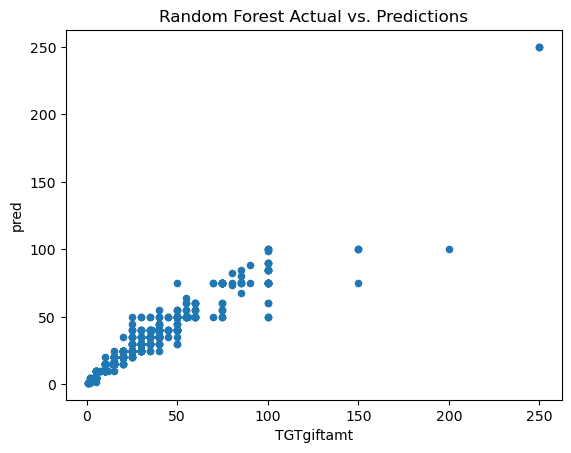

In [172]:
# visualizing random forest predictions vs actual y values
df.sample(n=1000, random_state=12345).plot(kind='scatter', x='TGTgiftamt', y='pred', title='Random Forest Actual vs. Predictions')

In [173]:
# storing decision tree predictions in dataframe for visualization
df2 = pd.DataFrame(train_responders[[y_name, 'masterprimaryid']])
df2['pred'] = abs(trans_dt.predict(train_responders[x_names_2]))
df2

,TGTgiftamt,masterprimaryid,pred
75,80.0,000136CC-D469-4445-BB7C-6B7F05C36E04,80.0
128,5.0,00026531-DC7A-4A10-A63A-86CFA19829A6,5.0
149,25.0,0002F58D-87F3-4AA4-A9A9-0EB48427124C,25.0
209,15.0,0003F6B2-437C-4EB3-95F6-B9D9E7263BB8,15.0
225,25.0,00043A08-D7D4-4B7C-ACC0-F56F470E08D4,25.0
...,...,...,...
3276322,25.0,FFF9CC6C-81F2-4D28-B928-03C41696783D,25.0
3276416,40.0,FFFB7D3A-BAED-410E-AE52-5322FB71464B,40.0
3276505,50.0,FFFD2D21-AA65-4FA4-B885-B2A015D72E1D,50.0
3276538,10.0,FFFE0FCC-B7BF-41EB-8EEB-FB48FE08A169,10.0


(0.0, 250.0)

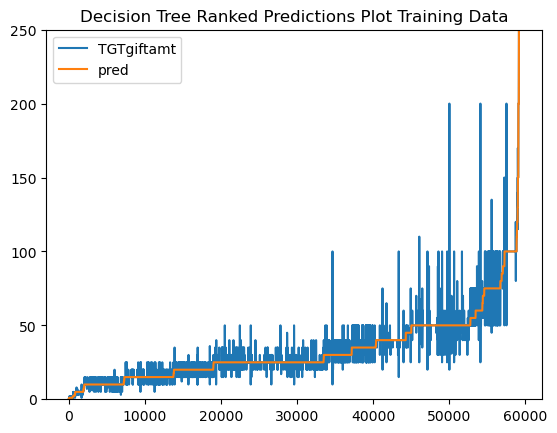

In [174]:
# visualizing performance of decision tree
df2.sort_values(by='pred', inplace=True)
df2.reset_index(inplace=True, drop=True)
df2.plot(title='Decision Tree Ranked Predictions Plot Training Data')
plt.ylim((0,250))

<Axes: title={'center': 'Decision Tree Actual vs. Predictions'}, xlabel='TGTgiftamt', ylabel='pred'>

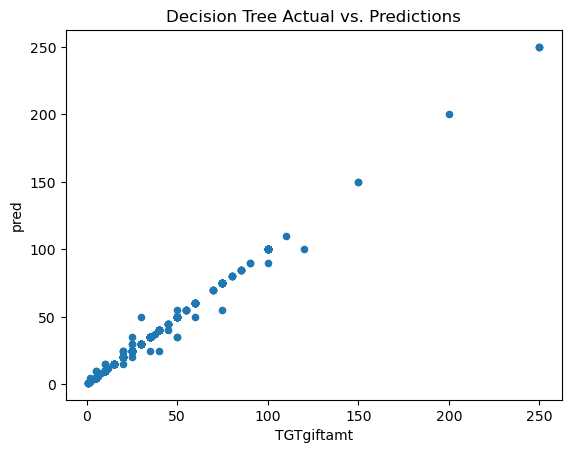

In [175]:
# visualizing decision tree predictions vs actual y values
df2.sample(n=1000, random_state=12345).plot(kind='scatter', x='TGTgiftamt', y='pred', title='Decision Tree Actual vs. Predictions')

In [176]:
# shortcut names
rf_yhat_name = 'phat_rf'
rf_r_name = 'r_rf'

# calculate predictions for transformed random forest
rf_rem_phat = pd.DataFrame(trans_rf.predict(test_responders[x_names_2]), columns=['phat_rf'])
rf_rem_phat = pd.concat([test_responders[x_names_2].reset_index(drop=True),test_responders[y_name].reset_index(drop=True), abs(rf_rem_phat)], axis=1)
# calculate residuals
rf_rem_phat[rf_r_name] = rf_rem_phat[y_name] - rf_rem_phat[rf_yhat_name]

In [177]:
rf_rem_phat.sort_values(by='r_rf', ascending=False).head()

,HPG_amount,MRG_amount,avg_gift_amt,first_gift_amount,append_direct_trans,append_fundraisingpartners,append_HouseHoldEducation,append_WealthResources,append_age,append_web,append_competitors,append_parks_nature,TGTgiftamt,phat_rf,r_rf
5331,50.0,50.0,34.090909,20.0,0,0,4,8,79.0,0,3,1,5000.0,50.0,4950.0
5859,85.0,85.0,38.181818,35.0,0,0,2,1,58.0,0,8,0,4000.0,75.0,3925.0
2174,25.0,20.0,22.500000,25.0,3,0,5,10,76.0,3,0,1,2500.0,30.0,2470.0
3552,60.0,60.0,25.000000,10.0,7,2,4,9,70.0,3,3,3,2500.0,75.0,2425.0
13843,75.0,60.0,46.818182,10.0,11,6,2,5,57.0,0,18,1,2000.0,50.0,1950.0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


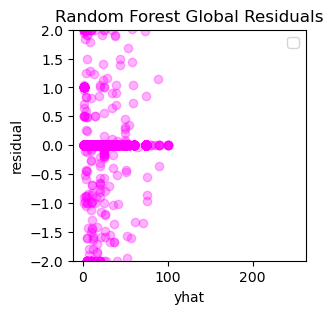

In [178]:
# initialize figure
fig, ax_ = plt.subplots(figsize=(3, 3))

# plot groups with appropriate color
color_list = ['royalblue', 'magenta']
c_idx = 0

ax_.plot(rf_rem_phat[rf_yhat_name], rf_rem_phat[rf_r_name],
             marker='o', linestyle='', color=color_list[1], alpha=0.3)
plt.ylim((-2,2))
# annotate plot
_ = plt.xlabel('yhat')
_ = plt.ylabel('residual')
_ = ax_.legend(loc=1)
_ = plt.title('Random Forest Global Residuals')

In [179]:
# shortcut names
dt_yhat_name = 'phat_dt'
dt_r_name = 'r_dt'

# calculate predictions for decision tree
dt_rem_phat = pd.DataFrame(dt.predict(test_responders[x_names_2]), columns=['phat_dt'])
dt_rem_phat = pd.concat([test_responders[x_names_2].reset_index(drop=True),test_responders[y_name].reset_index(drop=True), abs(dt_rem_phat)], axis=1)
# calculate residuals
dt_rem_phat[dt_r_name] = dt_rem_phat[y_name] - dt_rem_phat[dt_yhat_name]

In [180]:
dt_rem_phat.sort_values(by='r_dt', ascending=False).head()

,HPG_amount,MRG_amount,avg_gift_amt,first_gift_amount,append_direct_trans,append_fundraisingpartners,append_HouseHoldEducation,append_WealthResources,append_age,append_web,append_competitors,append_parks_nature,TGTgiftamt,phat_dt,r_dt
5331,50.0,50.0,34.090909,20.0,0,0,4,8,79.0,0,3,1,5000.0,50.0,4950.0
5859,85.0,85.0,38.181818,35.0,0,0,2,1,58.0,0,8,0,4000.0,60.0,3940.0
2174,25.0,20.0,22.500000,25.0,3,0,5,10,76.0,3,0,1,2500.0,25.0,2475.0
3552,60.0,60.0,25.000000,10.0,7,2,4,9,70.0,3,3,3,2500.0,100.0,2400.0
13843,75.0,60.0,46.818182,10.0,11,6,2,5,57.0,0,18,1,2000.0,50.0,1950.0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


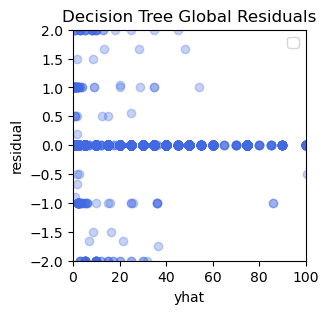

In [181]:
# initialize figure
fig, ax_ = plt.subplots(figsize=(3, 3))

# plot groups with appropriate color
color_list = ['royalblue', 'magenta']
c_idx = 0

ax_.plot(dt_rem_phat[dt_yhat_name], dt_rem_phat[dt_r_name],
             marker='o', linestyle='', color=color_list[0], alpha=0.3)
plt.ylim((-2,2))
plt.xlim((0,100))
# annotate plot
_ = plt.xlabel('yhat')
_ = plt.ylabel('residual')
_ = ax_.legend(loc=1)
_ = plt.title('Decision Tree Global Residuals')

In [182]:
n_remove = 50
rf_rem_data = rf_rem_phat.copy(deep=True)
rf_rem_data.drop(list(rf_rem_phat.sort_values(by='r_rf', ascending=False).head(n=n_remove).index), axis=0, inplace=True)

In [183]:
np.random.seed(SEED) # preserve exact reproducibility for this cell

# execute split
split = np.random.rand(len(rf_rem_data)) < split_ratio
rf_rem_train = rf_rem_data[split]
rf_rem_valid = rf_rem_data[~split]

# summarize split
print('Random Forest remediated train data rows = %d, columns = %d' % (rf_rem_train.shape[0], rf_rem_train.shape[1]))
print('Random Forest remediated validation data rows = %d, columns = %d' % (rf_rem_valid.shape[0], rf_rem_valid.shape[1]))

# retrain
rf_2 = RandomForestRegressor(random_state=12345)
rf_2.fit(rf_rem_train[x_names_2], rf_rem_train[y_name])
rf_rem_ypred = rf_2.predict(rf_rem_valid[x_names_2])
rf_rem_mae_pred = round(mean_absolute_error(rf_rem_valid[y_name], rf_rem_ypred),3)
print('Random Forest Remediated under-sampled MAE: %.4f.' % rf_rem_mae_pred)

Random Forest remediated train data rows = 17834, columns = 15
Random Forest remediated validation data rows = 7778, columns = 15
Random Forest Remediated under-sampled MAE: 9.6610.


In [184]:
n_remove = 50
dt_rem_data = dt_rem_phat.copy(deep=True)
dt_rem_data.drop(list(dt_rem_phat.sort_values(by='r_dt', ascending=False).head(n=n_remove).index), axis=0, inplace=True)

In [185]:
np.random.seed(SEED) # preserve exact reproducibility for this cell

# execute split
split = np.random.rand(len(dt_rem_data)) < split_ratio
dt_rem_train = dt_rem_data[split]
dt_rem_valid = dt_rem_data[~split]

# summarize split
print('Decision Tree remediated train data rows = %d, columns = %d' % (dt_rem_train.shape[0], dt_rem_train.shape[1]))
print('Decision tree remediated validation data rows = %d, columns = %d' % (dt_rem_valid.shape[0], dt_rem_valid.shape[1]))

# retrain
dt_2 = DecisionTreeRegressor(random_state=12345)
dt_2.fit(dt_rem_train[x_names_2], dt_rem_train[y_name])
dt_rem_ypred = dt_2.predict(dt_rem_valid[x_names_2])
dt_rem_mae_pred = round(mean_absolute_error(dt_rem_valid[y_name], dt_rem_ypred),3)
print('Decision Tree Remediated under-sampled MAE: %.4f.' % dt_rem_mae_pred)

Decision Tree remediated train data rows = 17834, columns = 15
Decision tree remediated validation data rows = 7778, columns = 15
Decision Tree Remediated under-sampled MAE: 12.7150.


In [186]:
ypred_test = rf_2.predict(test_responders[x_names_2])

In [187]:
round(mean_absolute_error(test_responders[y_name], ypred_test),3)

6.886

In [188]:
ypred_test2 = dt_2.predict(test_responders[x_names_2])

In [189]:
round(mean_absolute_error(test_responders[y_name], ypred_test2),3)

5.354

### Average Phase 2 Model Results

In [190]:
result2 = pd.DataFrame(test_responders[['masterprimaryid', 'TGTgiftamt']])
result2['pred1'] = ypred_test
result2

,masterprimaryid,TGTgiftamt,pred1
157,00031D6C-0E51-4DF1-B56C-0C55039E3760,60.0,42.875
457,0007C9BF-54F2-4FBD-A2A9-A751772A5B61,25.0,22.000
546,000955D0-4B32-4873-AC9C-9843D4CA0690,10.0,12.680
738,000D940B-78F6-4EDC-AC91-6258C7E6054F,25.0,39.550
777,000E7665-2988-47C7-B7B7-04DEA1B55A27,15.0,16.150
...,...,...,...
3276110,FFF56AAA-D614-4A06-B28C-1BF545A3AD13,50.0,57.500
3276348,FFF9F57E-86A6-4799-9AE9-03B181EEB80C,55.0,57.700
3276417,FFFB7D3A-BAED-410E-AE52-5322FB71464B,40.0,43.000
3276539,FFFE0FCC-B7BF-41EB-8EEB-FB48FE08A169,10.0,17.130


In [191]:
tree2df = pd.DataFrame(test_responders['TGTgiftamt'])
tree2df['pred2'] = ypred_test2
tree2df

,TGTgiftamt,pred2
157,60.0,30.0
457,25.0,25.0
546,10.0,10.0
738,25.0,25.0
777,15.0,15.0
...,...,...
3276110,50.0,50.0
3276348,55.0,55.0
3276417,40.0,40.0
3276539,10.0,5.0


In [192]:
result2['pred'] = ((result2['pred1'] + tree2df['pred2']) / 2)
result2 = result2.drop(columns=['pred1'])

In [193]:
result2.head()

,masterprimaryid,TGTgiftamt,pred
157,00031D6C-0E51-4DF1-B56C-0C55039E3760,60.0,36.4375
457,0007C9BF-54F2-4FBD-A2A9-A751772A5B61,25.0,23.5000
546,000955D0-4B32-4873-AC9C-9843D4CA0690,10.0,11.3400
738,000D940B-78F6-4EDC-AC91-6258C7E6054F,25.0,32.2750
777,000E7665-2988-47C7-B7B7-04DEA1B55A27,15.0,15.5750


(0.0, 500.0)

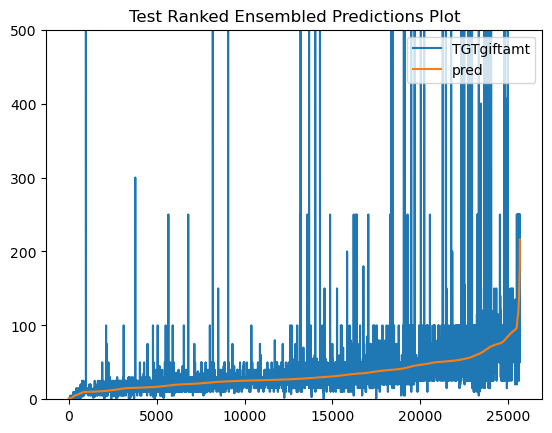

In [199]:
graph_result2 = result2
graph_result2.sort_values(by='pred', inplace=True)
graph_result2.reset_index(inplace=True, drop=True)
graph_result2.plot(title='Test Ranked Ensembled Predictions Plot')
plt.ylim(0, 500)

(0.0, 250.0)

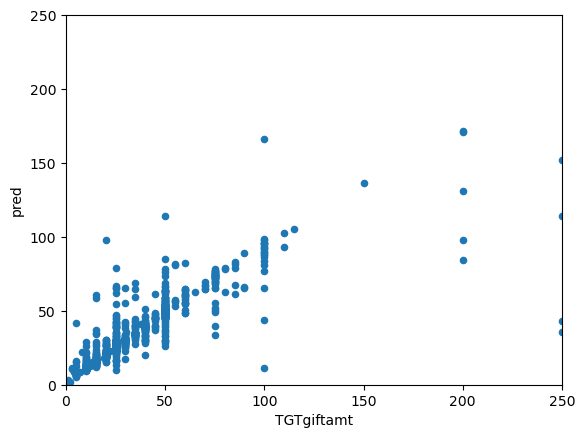

In [195]:
graph_result2.sample(n=1000).plot(kind='scatter', x='TGTgiftamt', y='pred')
plt.xlim(0, 250)
plt.ylim(0, 250)

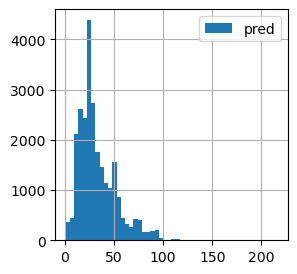

In [196]:
_ = graph_result2['pred'].hist(bins=50, figsize=(3, 3), legend='pred')

(0.0, 250.0)

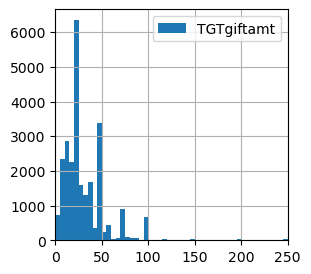

In [197]:
_ = test_responders['TGTgiftamt'].hist(bins=1000, figsize=(3, 3), legend='TGTgiftamt')
plt.xlim(0, 250)

In [198]:
round(mean_absolute_error(result2['TGTgiftamt'], result2['pred']),3)

5.983

### Results

In [200]:
result1

,masterprimaryid,TGTresp,pred,TGT_pred
0,000004E1-D14E-42AB-A384-40A2773F507C,0,0.039759,0
6,000026B3-046F-4E71-9C90-9BDEF05882F5,0,0.030071,0
8,000026B3-046F-4E71-9C90-9BDEF05882F5,0,0.030071,0
10,0000357F-B1E3-4A2E-9736-345D032DA73E,0,0.159337,0
11,0000357F-B1E3-4A2E-9736-345D032DA73E,0,0.235755,0
...,...,...,...,...
3276636,FFFFCA06-BA99-4475-B616-FA84CAB719BB,0,0.029845,0
3276637,FFFFD24D-7BE2-41BD-9245-F19C69DCF614,0,0.042504,0
3276643,FFFFE9E1-08C2-4236-813A-2F010F37A078,0,0.063448,0
3276644,FFFFE9E1-08C2-4236-813A-2F010F37A078,0,0.126498,0


In [201]:
result2

,masterprimaryid,TGTgiftamt,pred
0,142EA3AA-D18D-43BE-99AB-BD932BD00A04,1.0,1.000
1,142EA3AA-D18D-43BE-99AB-BD932BD00A04,1.0,1.000
2,6F80E745-1F73-4E8E-AC8D-C60821FF6F67,1.0,1.000
3,C9901DF7-6BCB-4901-AF56-F6369885CDE5,1.0,1.000
4,D486294C-2E2D-4D48-950A-0163325BFDC7,1.0,1.000
...,...,...,...
25657,80975D37-8A4F-4AE2-B03B-C99491B37633,200.0,181.050
25658,BD1C336C-5862-4028-9C09-5A2BD844B97A,200.0,181.225
25659,DABDAEB2-B2FA-4146-A707-EED2498CA9B8,200.0,183.300
25660,76134A7F-9530-4E97-A5E2-B0BD2A15C9C2,200.0,184.050


In [210]:
final = result1.merge(result2, how='outer', on='masterprimaryid')


In [211]:
final

,masterprimaryid,TGTresp,pred_x,TGT_pred,TGTgiftamt,pred_y
0,000004E1-D14E-42AB-A384-40A2773F507C,0,0.039759,0,NaN,NaN
1,000026B3-046F-4E71-9C90-9BDEF05882F5,0,0.030071,0,NaN,NaN
2,000026B3-046F-4E71-9C90-9BDEF05882F5,0,0.030071,0,NaN,NaN
3,0000357F-B1E3-4A2E-9736-345D032DA73E,0,0.159337,0,NaN,NaN
4,0000357F-B1E3-4A2E-9736-345D032DA73E,0,0.235755,0,NaN,NaN
...,...,...,...,...,...,...
987623,FFFFCA06-BA99-4475-B616-FA84CAB719BB,0,0.029845,0,NaN,NaN
987624,FFFFD24D-7BE2-41BD-9245-F19C69DCF614,0,0.042504,0,NaN,NaN
987625,FFFFE9E1-08C2-4236-813A-2F010F37A078,0,0.063448,0,NaN,NaN
987626,FFFFE9E1-08C2-4236-813A-2F010F37A078,0,0.126498,0,NaN,NaN


In [212]:
final['pred_y'].fillna(0.0, inplace=True)
final['expected_value'] = final['pred_x']*final['pred_y']
#result1['TGTgiftamt'] = result2['TGTgiftamt']
final

,masterprimaryid,TGTresp,pred_x,TGT_pred,TGTgiftamt,pred_y,expected_value
0,000004E1-D14E-42AB-A384-40A2773F507C,0,0.039759,0,NaN,0.0,0.0
1,000026B3-046F-4E71-9C90-9BDEF05882F5,0,0.030071,0,NaN,0.0,0.0
2,000026B3-046F-4E71-9C90-9BDEF05882F5,0,0.030071,0,NaN,0.0,0.0
3,0000357F-B1E3-4A2E-9736-345D032DA73E,0,0.159337,0,NaN,0.0,0.0
4,0000357F-B1E3-4A2E-9736-345D032DA73E,0,0.235755,0,NaN,0.0,0.0
...,...,...,...,...,...,...,...
987623,FFFFCA06-BA99-4475-B616-FA84CAB719BB,0,0.029845,0,NaN,0.0,0.0
987624,FFFFD24D-7BE2-41BD-9245-F19C69DCF614,0,0.042504,0,NaN,0.0,0.0
987625,FFFFE9E1-08C2-4236-813A-2F010F37A078,0,0.063448,0,NaN,0.0,0.0
987626,FFFFE9E1-08C2-4236-813A-2F010F37A078,0,0.126498,0,NaN,0.0,0.0


In [213]:
ctr = 0
sum = 0
for i in final['expected_value']:
    if i != 0.0:
        ctr+=1
        sum += i
print(f'mean of non-zero gifts: {sum/ctr}')

mean of non-zero gifts: 5.564998447490356


In [214]:
max(final['expected_value'])

79.37871343552557

In [215]:
final['expected_value'].mean()

0.3136843665548055

In [216]:
final.sort_values(by='expected_value', inplace=True)
final = final.drop(columns=['TGTresp', 'TGTgiftamt', 'TGT_pred'])
final

,masterprimaryid,pred_x,pred_y,expected_value
0,000004E1-D14E-42AB-A384-40A2773F507C,0.039759,0.000000,0.000000
648797,A7FFD452-8C3E-4196-BD2F-63FC3464FD8B,0.063906,0.000000,0.000000
648798,A7FFE402-0B2A-4EA8-8B1C-01C40177E6B1,0.062872,0.000000,0.000000
648799,A7FFE402-0B2A-4EA8-8B1C-01C40177E6B1,0.062872,0.000000,0.000000
648800,A7FFE446-3CB2-4EDE-BADD-3AD20CD8C82C,0.103079,0.000000,0.000000
...,...,...,...,...
149977,26E5D364-054F-47DB-8BCC-A9A56DBCA6E6,0.875097,76.616667,67.046998
22771,05D7A30B-B6F5-434A-B779-F6B6B2EDCC3C,0.564323,123.450000,69.665659
185739,30024BB9-65A5-4854-9BD0-77FD06D6F87C,0.640389,112.775000,72.219923
788593,CC5BA7EC-F075-4814-A287-40F2A13E8B60,0.718359,110.500000,79.378713


In [217]:
ctr = 0
for i in final['expected_value']:
    if i > 0:
        ctr+=1
print(ctr)

55670


In [ ]:
ensemble = VotingClassifier(estimators=[('lr', clftree), ('dt', logis_reg)], voting='soft')

In [ ]:
ensemble.fit(train[x_names], train[y_name])

In [ ]:
ens_roc = roc_auc_score(valid[y_name], ensemble.predict_proba(valid[x_names])[:, 1])
ens_roc

In [ ]:
yhat = ensemble.predict_proba(valid[x_names])[:,1]

In [ ]:
ks = ks_2samp(valid[y_name], yhat)
ks

In [ ]:
# confusion matrix for threshold = .5
y_pred = ensemble.predict(valid[x_names])
cm = confusion_matrix(valid[y_name], y_pred, labels=ensemble.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=ensemble.classes_)
disp.plot()
plt.show()

In [ ]:
ensemble_results = pd.DataFrame(valid[y_name])

In [ ]:
ensemble_results['pred'] = yhat